# ElectroShop Purchase Prediction - EDA & Feature Engineering

**Team Member:** [Your Name]

**Date:** November 13, 2025

## Objective
- Explore the ElectroShop dataset
- Understand purchase patterns
- Create meaningful features to improve prediction
- Reduce marketing costs from €630/day to ≤€200/day while maintaining sales

## 1. Setup & Data Loading

In [42]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [43]:
# Load data
train_df = pd.read_csv('/Users/jakobbullinger/Documents/Coding Projects/DSBA/Intro Machine Learning/kaggle_competition/data/raw/train_dataset_M1_with_id.csv')
test_df = pd.read_csv('/Users/jakobbullinger/Documents/Coding Projects/DSBA/Intro Machine Learning/kaggle_competition/data/raw/test_dataset_M1_with_id.csv')

print(f"Training set shape: {train_df.shape}")
print(f"Test set shape: {test_df.shape}")

Training set shape: (13735, 22)
Test set shape: (6265, 21)


## 2. Initial Data Exploration

In [44]:
# First look at the data
train_df.head(10)

,id,Age,Gender,Reviews_Read,Price,Discount,Category,Items_In_Cart,Time_of_Day,Email_Interaction,Device_Type,Payment_Method,Referral_Source,Socioeconomic_Status_Score,Engagement_Score,AB_Bucket,Price_Sine,PM_RS_Combo,Session_ID,Day,Campaign_Period,Purchase
0,1,NaN,1.0,3.0,592.975,22.0,1.0,6.0,afterno0n,0.0,Mobile,Credit,NaN,7.26,1.856520,3.0,0.999047,Credit:Social_media,S0000003,59,False,0
1,2,25.0,1.0,1.0,511.279,12.0,0.0,3.0,morning,1.0,Tablet,Cash,Social_media,8.30,1.868138,5.0,-0.129689,Cash:Social_media,S0000005,29,True,1
2,3,22.0,0.0,3.0,218.360,2.0,1.0,4.0,evening,1.0,Mobile,Bank,Social_media,6.61,1.223445,0.0,-0.421646,Bank:Social_media,S0000007,16,False,0
3,4,24.0,0.0,3.0,313.781,1.0,3.0,0.0,evening,1.0,Mobile,pay pal,Social_media,10.51,0.359684,1.0,-0.988239,NaN,S0000008,53,False,0
4,5,35.0,1.0,1.0,495.088,13.0,0.0,2.0,evening,0.0,Mobile,Cash,Social_media,8.33,3.848580,2.0,0.695737,Cash:Social_media,S0000009,10,False,0
5,6,28.0,0.0,2.0,188.807,21.0,2.0,NaN,evening,0.0,Desktop,NaN,Direct,3.13,0.863242,3.0,-0.874546,Bank:Direct,S0000010,57,False,0
6,7,NaN,1.0,2.0,479.629,41.0,4.0,6.0,afternoon,1.0,Mobile,Bank,Search_engine,NaN,0.828184,4.0,0.998348,Bank:Search_engine,S0000011,26,True,0
7,8,19.0,1.0,4.0,NaN,12.0,3.0,14.0,morning,NaN,Desktop,Bank,Search_engine,1.62,1.486695,6.0,0.862095,Bank:Search_engine,S0000013,12,False,0
8,9,18.0,0.0,5.0,831.402,2.0,3.0,2.0,morning,0.0,Desktop,PayPal,Search_engine,6.23,1.376030,NaN,0.804534,PayPal:Search_engine,S0000014,47,True,0
9,10,22.0,1.0,4.0,234.562,14.0,1.0,2.0,morning,1.0,Mobile,Bank,Social_media,6.71,1.319739,2.0,0.448290,Bank:Social_media,S0000016,3,False,0


In [45]:
#unique values id
duplicates = train_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
print(f"Number of unique Session_IDs: {train_df['Session_ID'].nunique()}")

Number of duplicate rows: 0
Number of unique Session_IDs: 13455


In [46]:
# Data types and missing values
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13735 entries, 0 to 13734
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          13735 non-null  int64  
 1   Age                         11648 non-null  float64
 2   Gender                      13475 non-null  float64
 3   Reviews_Read                13444 non-null  float64
 4   Price                       13101 non-null  float64
 5   Discount                    13462 non-null  float64
 6   Category                    13448 non-null  float64
 7   Items_In_Cart               13455 non-null  float64
 8   Time_of_Day                 13456 non-null  object 
 9   Email_Interaction           13471 non-null  float64
 10  Device_Type                 13457 non-null  object 
 11  Payment_Method              11683 non-null  object 
 12  Referral_Source             11714 non-null  object 
 13  Socioeconomic_Status_Score  134

In [47]:
# Summary statistics
train_df.describe()

,id,Age,Gender,Reviews_Read,Price,Discount,Category,Items_In_Cart,Email_Interaction,Socioeconomic_Status_Score,Engagement_Score,AB_Bucket,Price_Sine,Day,Purchase
count,13735.000000,11648.000000,13475.000000,13444.000000,13101.000000,13462.000000,13448.000000,13455.000000,13471.000000,13460.000000,13463.000000,13466.000000,13451.000000,13735.000000,13735.000000
mean,6868.000000,31.966089,0.493655,2.985049,560.524838,25.135195,1.999703,3.515199,0.455349,5.121274,2.264977,3.008689,0.009677,35.379177,0.368111
std,3965.097309,12.917241,0.499978,1.723548,762.463807,14.939578,1.423125,2.864808,0.498021,3.451796,1.444275,2.000074,0.707559,20.297165,0.482309
min,1.000000,18.000000,0.000000,0.000000,5.127000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,1.000000,0.000000
25%,3434.500000,22.000000,0.000000,2.000000,254.649000,12.000000,1.000000,1.000000,0.000000,2.530000,1.069302,1.000000,-0.699921,18.000000,0.000000
50%,6868.000000,28.000000,0.000000,3.000000,498.707000,25.000000,2.000000,3.000000,0.000000,4.530000,2.109085,3.000000,0.032957,36.000000,0.000000
75%,10301.500000,39.000000,1.000000,4.000000,750.372000,38.000000,3.000000,5.000000,1.000000,7.130000,3.325173,5.000000,0.707120,53.000000,1.000000
max,13735.000000,65.000000,1.000000,11.000000,14988.319963,90.000000,4.000000,28.000000,1.000000,22.340000,6.398595,6.000000,1.000000,70.000000,1.000000


In [48]:
# Check for missing values
missing = train_df.isnull().sum()
missing_pct = 100 * missing / len(train_df)
missing_df = pd.DataFrame({'Missing_Count': missing, 'Percentage': missing_pct})
missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

,Missing_Count,Percentage
Age,2087,15.194758
Payment_Method,2052,14.939934
Referral_Source,2021,14.714234
Price,634,4.615945
Reviews_Read,291,2.118675
Category,287,2.089552
Price_Sine,284,2.067710
Session_ID,280,2.038588
Items_In_Cart,280,2.038588
Time_of_Day,279,2.031307


In [49]:
# Check for duplicates
duplicates = train_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
print(f"Number of unique Session_IDs: {train_df['Session_ID'].nunique()}")

# missing values in Session_ID
missing_session_ids = train_df['Session_ID'].isnull().sum()
print(f"Number of missing Session_IDs: {missing_session_ids}")

Number of duplicate rows: 0
Number of unique Session_IDs: 13455
Number of missing Session_IDs: 280


### Additional Part:  Check what AB_Bucket, Price_Sine, and PM_RS_Combo are

In [50]:
print("Unique AB_Bucket values:")
print(train_df['AB_Bucket'].value_counts())
print("\n" + "="*60)

print("\nPrice_Sine statistics:")
print(train_df['Price_Sine'].describe())
print("\n" + "="*60)

print("\nPM_RS_Combo - looks like Payment_Method:Referral_Source combo")
print(train_df['PM_RS_Combo'].value_counts().head(10))
print("\n" + "="*60)

Unique AB_Bucket values:
AB_Bucket
6.0    1947
4.0    1943
3.0    1932
2.0    1924
0.0    1919
5.0    1904
1.0    1897
Name: count, dtype: int64


Price_Sine statistics:
count    13451.000000
mean         0.009677
std          0.707559
min         -1.000000
25%         -0.699921
50%          0.032957
75%          0.707120
max          1.000000
Name: Price_Sine, dtype: float64


PM_RS_Combo - looks like Payment_Method:Referral_Source combo
PM_RS_Combo
Bank:Search_engine      720
PayPal:Search_engine    714
Cash:Direct             711
Bank:Social_media       702
PayPal:Ads              701
PayPal:Social_media     687
Cash:Email              679
Bank:Email              678
PayPal:Direct           676
Cash:Social_media       673
Name: count, dtype: int64



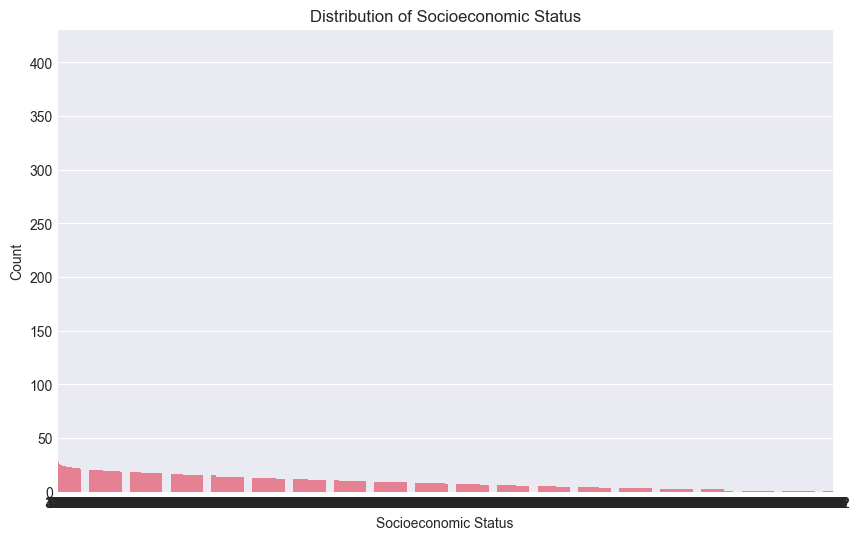

In [51]:
# Distribution of socioeconomic status
plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, x='Socioeconomic_Status_Score', order=train_df['Socioeconomic_Status_Score'].value_counts().index)
plt.title('Distribution of Socioeconomic Status')
plt.xlabel('Socioeconomic Status')
plt.ylabel('Count')
plt.show()

### Deep dive into missing data patterns

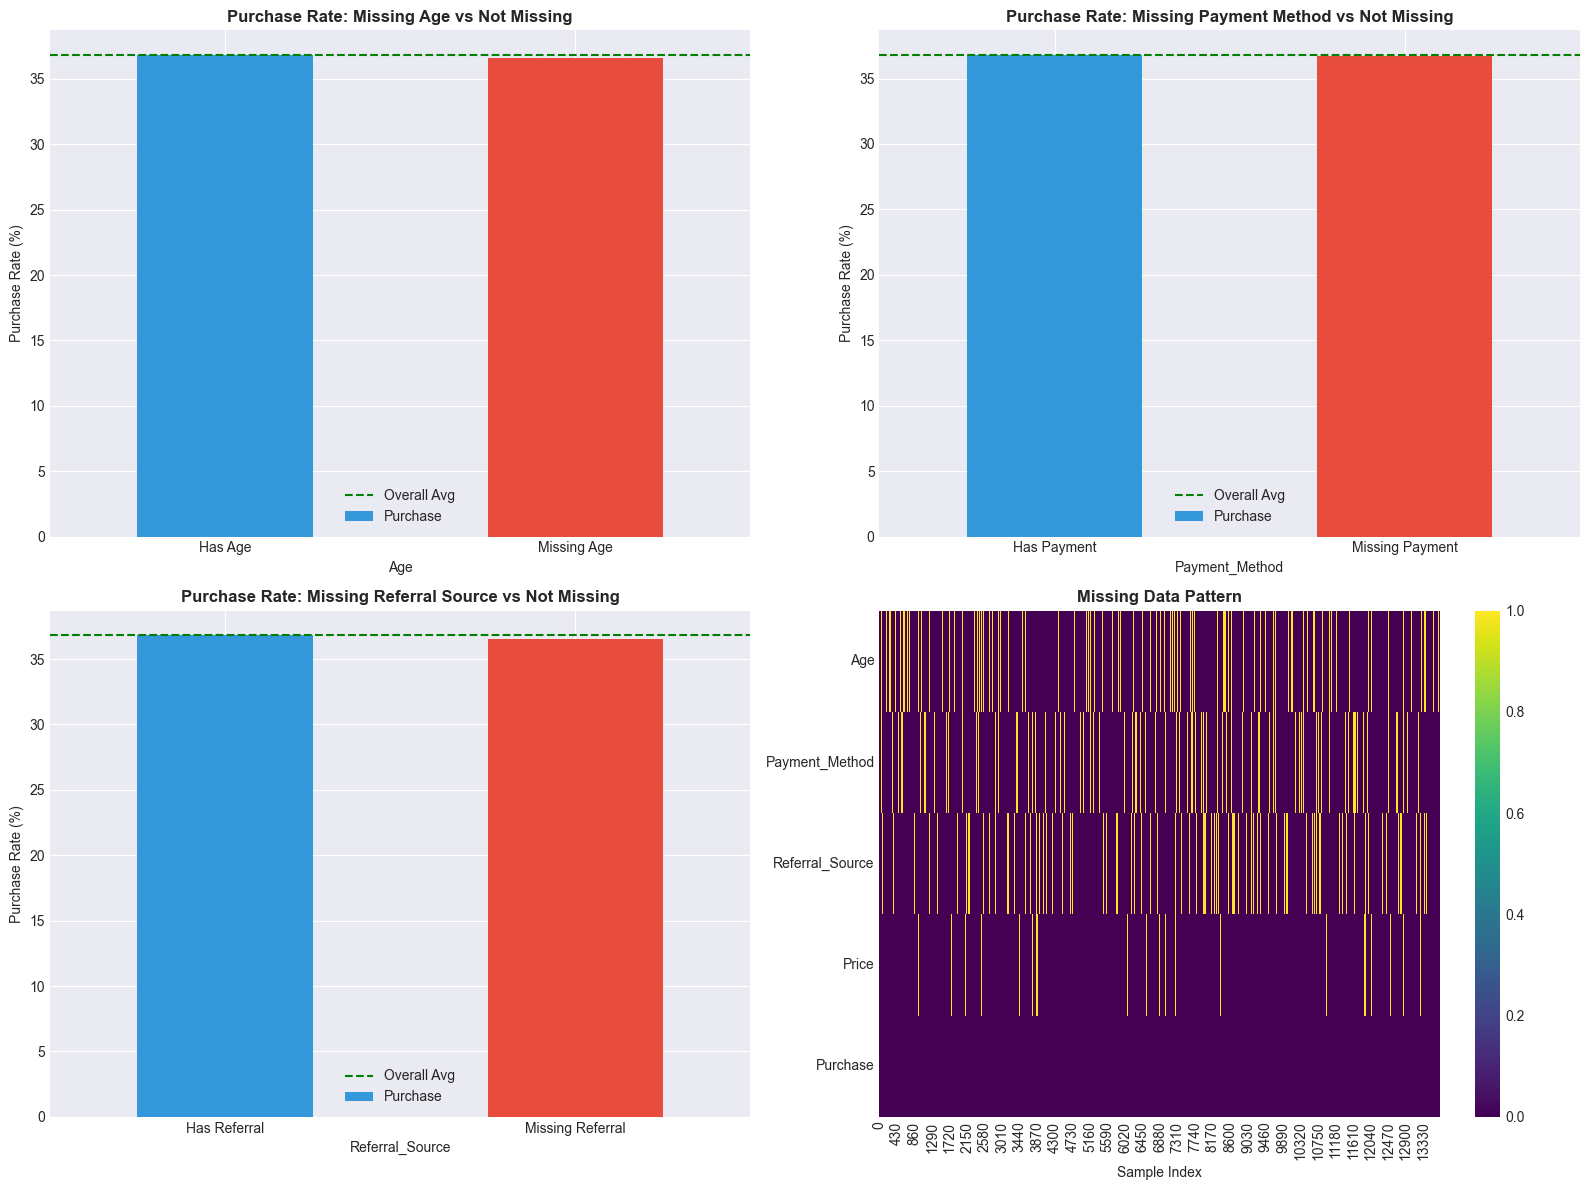


🔍 KEY INSIGHT:
If purchase rates differ significantly between missing/not-missing groups,
the missing data is NOT random (MAR/MNAR) - we should handle it carefully!


In [52]:
# Are missing values random or systematic?
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Purchase rate by missing Age
missing_age = train_df['Age'].isnull()
purchase_by_missing_age = train_df.groupby(missing_age)['Purchase'].mean() * 100
purchase_by_missing_age.plot(kind='bar', ax=axes[0,0], color=['#3498db', '#e74c3c'])
axes[0,0].set_title('Purchase Rate: Missing Age vs Not Missing', fontsize=12, fontweight='bold')
axes[0,0].set_xticklabels(['Has Age', 'Missing Age'], rotation=0)
axes[0,0].set_ylabel('Purchase Rate (%)')
axes[0,0].axhline(y=train_df['Purchase'].mean()*100, color='green', linestyle='--', label='Overall Avg')
axes[0,0].legend()

# 2. Purchase rate by missing Payment Method
missing_pm = train_df['Payment_Method'].isnull()
purchase_by_missing_pm = train_df.groupby(missing_pm)['Purchase'].mean() * 100
purchase_by_missing_pm.plot(kind='bar', ax=axes[0,1], color=['#3498db', '#e74c3c'])
axes[0,1].set_title('Purchase Rate: Missing Payment Method vs Not Missing', fontsize=12, fontweight='bold')
axes[0,1].set_xticklabels(['Has Payment', 'Missing Payment'], rotation=0)
axes[0,1].set_ylabel('Purchase Rate (%)')
axes[0,1].axhline(y=train_df['Purchase'].mean()*100, color='green', linestyle='--', label='Overall Avg')
axes[0,1].legend()

# 3. Purchase rate by missing Referral Source
missing_rs = train_df['Referral_Source'].isnull()
purchase_by_missing_rs = train_df.groupby(missing_rs)['Purchase'].mean() * 100
purchase_by_missing_rs.plot(kind='bar', ax=axes[1,0], color=['#3498db', '#e74c3c'])
axes[1,0].set_title('Purchase Rate: Missing Referral Source vs Not Missing', fontsize=12, fontweight='bold')
axes[1,0].set_xticklabels(['Has Referral', 'Missing Referral'], rotation=0)
axes[1,0].set_ylabel('Purchase Rate (%)')
axes[1,0].axhline(y=train_df['Purchase'].mean()*100, color='green', linestyle='--', label='Overall Avg')
axes[1,0].legend()

# 4. Missing data heatmap
missing_matrix = train_df[['Age', 'Payment_Method', 'Referral_Source', 'Price', 'Purchase']].isnull()
sns.heatmap(missing_matrix.T, cmap='viridis', cbar=True, ax=axes[1,1], yticklabels=True)
axes[1,1].set_title('Missing Data Pattern', fontsize=12, fontweight='bold')
axes[1,1].set_xlabel('Sample Index')

plt.tight_layout()
plt.show()

print("\n🔍 KEY INSIGHT:")
print("If purchase rates differ significantly between missing/not-missing groups,")
print("the missing data is NOT random (MAR/MNAR) - we should handle it carefully!")

### CELL 3: Payment Method patterns

Payment Method Distribution:
Payment_Method
Bank             2864
PayPal           2852
Cash             2849
Credit           2709
pay_pal            57
creDit             55
cash               54
PayPAl             52
pay pal            51
CASH               50
bank_transfer      49
BAnk                6
CredIt              5
BaNk                4
CRedit              4
CaSh                4
BanK                3
CreDit              3
CrEdit              2
CrediT              2
PAyPal              1
creDIt              1
CRediT              1
CasH                1
PaYPal              1
PayPaL              1
CAsh                1
CRedIt              1
Name: count, dtype: int64

% Distribution:
Payment_Method
Bank             24.514251
PayPal           24.411538
Cash             24.385860
Credit           23.187537
pay_pal           0.487888
creDit            0.470769
cash              0.462210
PayPAl            0.445091
pay pal           0.436532
CASH              0.427972
bank_transfe

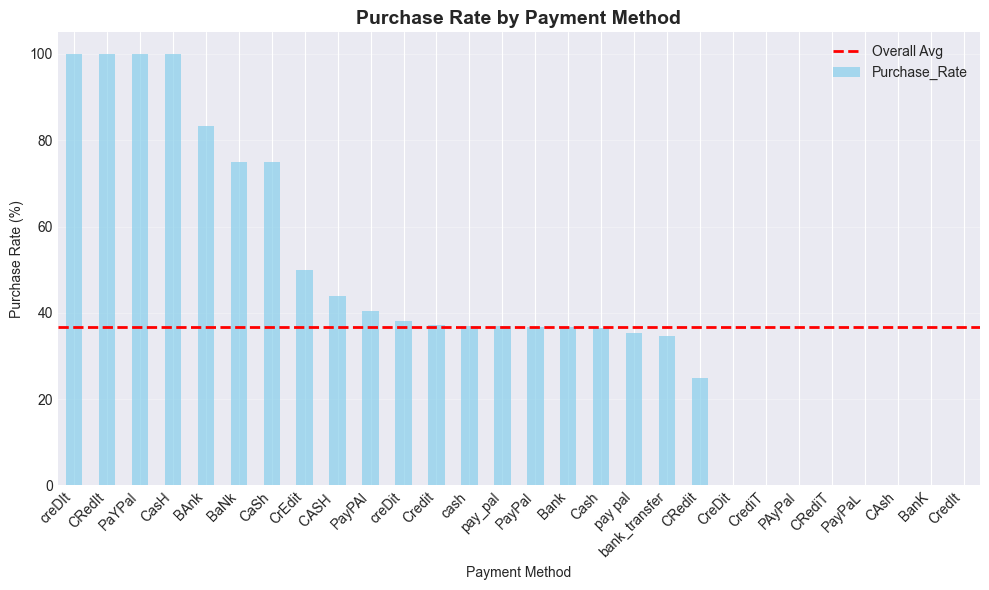

In [53]:
# Clean Payment Method analysis
print("Payment Method Distribution:")
print("="*60)
print(train_df['Payment_Method'].value_counts())
print("\n% Distribution:")
print(train_df['Payment_Method'].value_counts(normalize=True) * 100)

print("\n" + "="*60)
print("Purchase Rate by Payment Method:")
print("="*60)
payment_purchase = train_df.groupby('Payment_Method')['Purchase'].agg(['mean', 'count'])
payment_purchase.columns = ['Purchase_Rate', 'Count']
payment_purchase['Purchase_Rate'] = payment_purchase['Purchase_Rate'] * 100
payment_purchase = payment_purchase.sort_values('Purchase_Rate', ascending=False)
print(payment_purchase)

# Visualize
fig, ax = plt.subplots(figsize=(10, 6))
payment_purchase['Purchase_Rate'].plot(kind='bar', ax=ax, color='skyblue', alpha=0.7)
ax.axhline(y=train_df['Purchase'].mean()*100, color='red', linestyle='--', linewidth=2, label='Overall Avg')
ax.set_title('Purchase Rate by Payment Method', fontsize=14, fontweight='bold')
ax.set_ylabel('Purchase Rate (%)')
ax.set_xlabel('Payment Method')
ax.legend()
ax.grid(True, alpha=0.3, axis='y')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### CELL 4: Investigate unusual payment method

In [54]:
# I noticed "pay pal" with space in the head() output - data quality issue?
print("Unique Payment Methods (checking for inconsistencies):")
print(train_df['Payment_Method'].unique())
print(f"\nTotal unique values: {train_df['Payment_Method'].nunique()}")

# Check for variations
pm_lower = train_df['Payment_Method'].str.lower().value_counts()
print("\nPayment Methods (lowercase to check variations):")
print(pm_lower)

# Are there 'PayPal' and 'pay pal' both?
paypal_variations = train_df['Payment_Method'][train_df['Payment_Method'].str.contains('pay', case=False, na=False)].unique()
print(f"\nPayPal variations found: {paypal_variations}")


Unique Payment Methods (checking for inconsistencies):
['Credit' 'Cash' 'Bank' 'pay pal' nan 'PayPal' 'bank_transfer' 'creDit'
 'CrediT' 'CASH ' 'CRediT' 'pay_pal' 'cash' 'PayPAl' 'PAyPal' 'CaSh'
 'BanK' 'BAnk' 'CRedit' 'creDIt' 'CredIt' 'CasH' 'CrEdit' 'PaYPal'
 'CreDit' 'PayPaL' 'CAsh' 'BaNk' 'CRedIt']

Total unique values: 28

Payment Methods (lowercase to check variations):
Payment_Method
cash             2909
paypal           2907
bank             2877
credit           2783
pay_pal            57
pay pal            51
cash               50
bank_transfer      49
Name: count, dtype: int64

PayPal variations found: ['pay pal' 'PayPal' 'pay_pal' 'PayPAl' 'PAyPal' 'PaYPal' 'PayPaL']


### CELL 5: Campaign effectiveness deep dive


In [55]:
# Debug: Check Campaign_Period values
print("Campaign_Period info:")
print("="*60)
print(f"Total rows: {len(train_df)}")
print(f"Non-null Campaign_Period: {train_df['Campaign_Period'].notna().sum()}")
print(f"Null Campaign_Period: {train_df['Campaign_Period'].isna().sum()}")
print(f"\nUnique values BEFORE conversion:")
print(train_df['Campaign_Period'].unique())
print(f"\nValue counts BEFORE conversion:")
print(train_df['Campaign_Period'].value_counts(dropna=False))

# Don't convert yet - work with the string values directly
campaign_comparison = train_df.groupby('Campaign_Period', dropna=False).agg({
    'Purchase': ['mean', 'count', 'sum'],
    'Discount': 'mean',
    'Price': 'mean',
    'Engagement_Score': 'mean',
    'Email_Interaction': 'mean'
})

campaign_comparison.columns = ['_'.join(col).strip() for col in campaign_comparison.columns.values]
campaign_comparison['Purchase_mean'] = campaign_comparison['Purchase_mean'] * 100
campaign_comparison['Email_Interaction_mean'] = campaign_comparison['Email_Interaction_mean'] * 100

print("\n" + "="*60)
print("Campaign Period Comparison:")
print("="*60)
print(campaign_comparison)

# Calculate lift using string indices
if 'True' in campaign_comparison.index and 'False' in campaign_comparison.index:
    campaign_true = campaign_comparison.loc['True', 'Purchase_mean']
    campaign_false = campaign_comparison.loc['False', 'Purchase_mean']
    lift = (campaign_true / campaign_false - 1) * 100
    
    print(f"\n📈 CAMPAIGN LIFT: {lift:.1f}%")
    print(f"   → Campaign periods have {lift:.1f}% higher purchase rate!")
    
    # ROI calculation
    print("\n💰 ROUGH ROI ESTIMATE:")
    sessions_campaign = campaign_comparison.loc['True', 'Purchase_count']
    purchases_campaign = campaign_comparison.loc['True', 'Purchase_sum']
    cost_campaign = sessions_campaign * 0.10  # €0.10 per ad
    
    print(f"   → Sessions during campaigns: {sessions_campaign:.0f}")
    print(f"   → Purchases during campaigns: {purchases_campaign:.0f}")
    print(f"   → Cost: €{cost_campaign:.2f}")
    print(f"   → Cost per conversion: €{cost_campaign/purchases_campaign:.2f}")
else:
    print("\n⚠️ Available index values:", campaign_comparison.index.tolist())

Campaign_Period info:
Total rows: 13735
Non-null Campaign_Period: 13457
Null Campaign_Period: 278

Unique values BEFORE conversion:
[False True nan]

Value counts BEFORE conversion:
Campaign_Period
False    8504
True     4953
NaN       278
Name: count, dtype: int64

Campaign Period Comparison:
                 Purchase_mean  Purchase_count  Purchase_sum  Discount_mean  \
Campaign_Period                                                               
False                32.937441            8504          2801      25.263549   
True                 43.387846            4953          2149      24.902228   
NaN                  38.129496             278           106      25.350365   

                 Price_mean  Engagement_Score_mean  Email_Interaction_mean  
Campaign_Period                                                             
False            559.277911               2.264257               45.329341  
True             562.373062               2.265509               45.936469  
N

### CELL 6: Age analysis with missing values

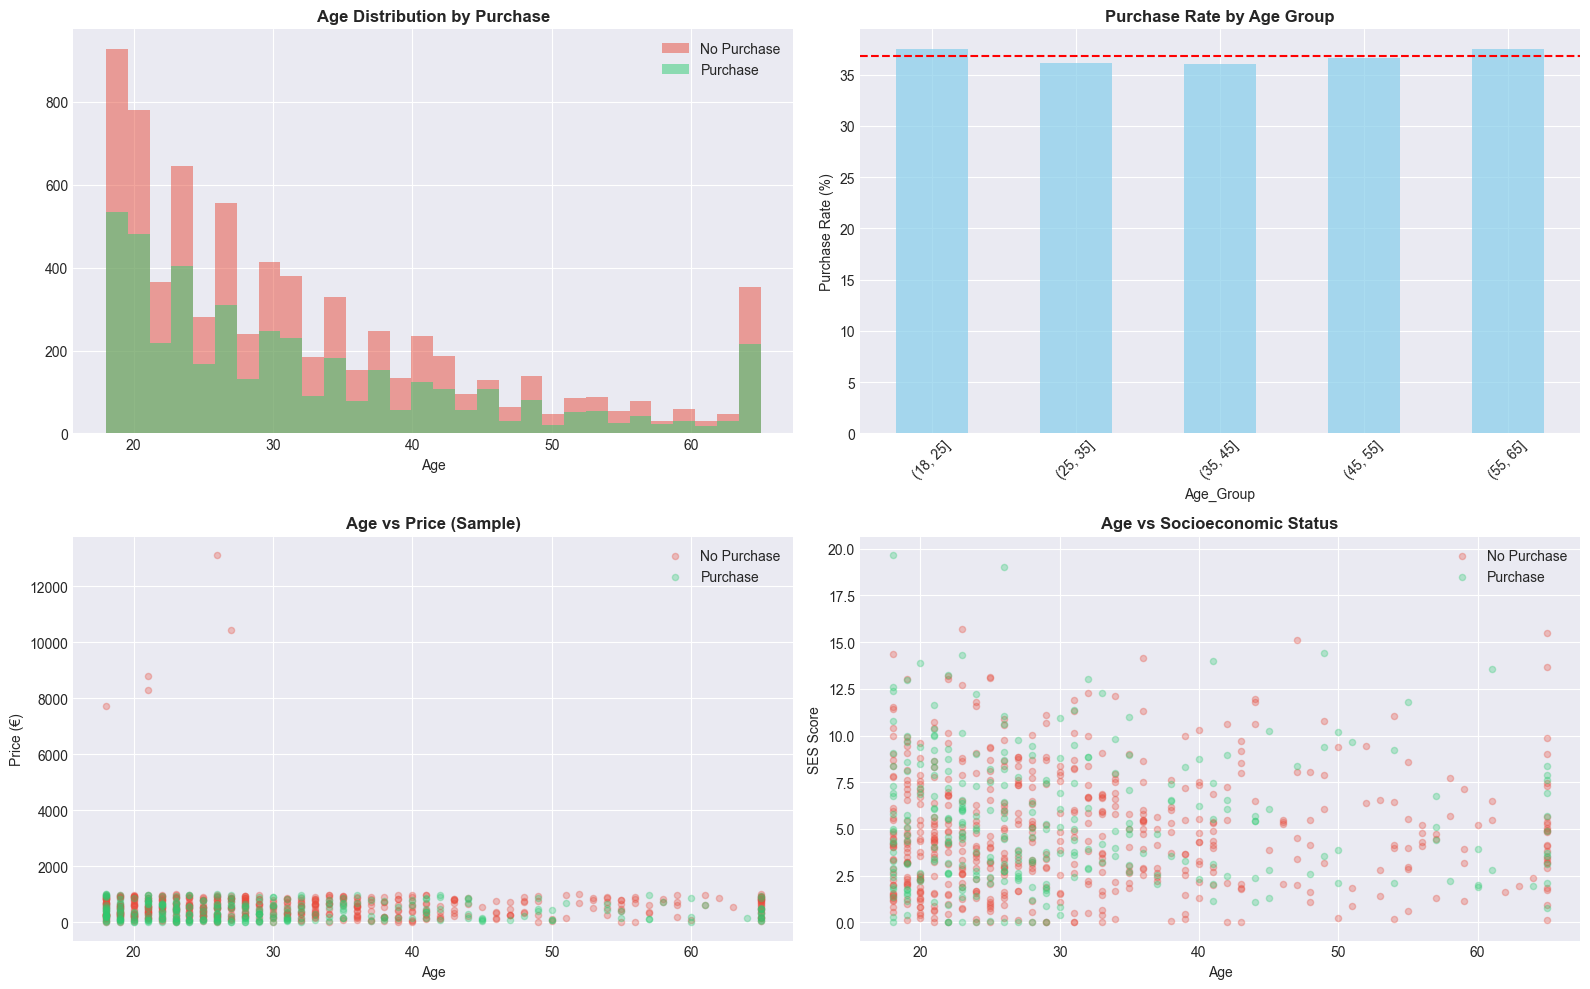

In [56]:
# Age distribution for those who have it
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# 1. Age distribution by purchase
train_df[train_df['Purchase']==0]['Age'].hist(bins=30, alpha=0.5, label='No Purchase', ax=axes[0,0], color='#e74c3c')
train_df[train_df['Purchase']==1]['Age'].hist(bins=30, alpha=0.5, label='Purchase', ax=axes[0,0], color='#2ecc71')
axes[0,0].set_title('Age Distribution by Purchase', fontsize=12, fontweight='bold')
axes[0,0].set_xlabel('Age')
axes[0,0].legend()

# 2. Purchase rate by age groups
train_df_with_age = train_df[train_df['Age'].notna()].copy()
train_df_with_age['Age_Group'] = pd.cut(train_df_with_age['Age'], bins=[18, 25, 35, 45, 55, 65])
age_purchase = train_df_with_age.groupby('Age_Group')['Purchase'].mean() * 100
age_purchase.plot(kind='bar', ax=axes[0,1], color='skyblue', alpha=0.7)
axes[0,1].set_title('Purchase Rate by Age Group', fontsize=12, fontweight='bold')
axes[0,1].set_ylabel('Purchase Rate (%)')
axes[0,1].axhline(y=train_df['Purchase'].mean()*100, color='red', linestyle='--')
axes[0,1].tick_params(axis='x', rotation=45)

# 3. Age vs Price (scatter)
sample = train_df.sample(1000)  # Sample for visibility
axes[1,0].scatter(sample[sample['Purchase']==0]['Age'], 
                  sample[sample['Purchase']==0]['Price'], 
                  alpha=0.3, label='No Purchase', s=20, c='#e74c3c')
axes[1,0].scatter(sample[sample['Purchase']==1]['Age'], 
                  sample[sample['Purchase']==1]['Price'], 
                  alpha=0.3, label='Purchase', s=20, c='#2ecc71')
axes[1,0].set_title('Age vs Price (Sample)', fontsize=12, fontweight='bold')
axes[1,0].set_xlabel('Age')
axes[1,0].set_ylabel('Price (€)')
axes[1,0].legend()

# 4. Age vs Socioeconomic Status
axes[1,1].scatter(sample[sample['Purchase']==0]['Age'], 
                  sample[sample['Purchase']==0]['Socioeconomic_Status_Score'], 
                  alpha=0.3, label='No Purchase', s=20, c='#e74c3c')
axes[1,1].scatter(sample[sample['Purchase']==1]['Age'], 
                  sample[sample['Purchase']==1]['Socioeconomic_Status_Score'], 
                  alpha=0.3, label='Purchase', s=20, c='#2ecc71')
axes[1,1].set_title('Age vs Socioeconomic Status', fontsize=12, fontweight='bold')
axes[1,1].set_xlabel('Age')
axes[1,1].set_ylabel('SES Score')
axes[1,1].legend()

plt.tight_layout()
plt.show()

Email Interaction Analysis:
                   Purchase_Rate  Sessions  Total_Purchases
Email_Interaction                                          
0.0                    31.511517      7337             2312
1.0                    42.859472      6134             2629

Purchase Rate by Email Interaction × Campaign Period:
Campaign_Period        False      True 
Email_Interaction                      
0.0                27.623220  38.000763
1.0                39.128137  49.348900


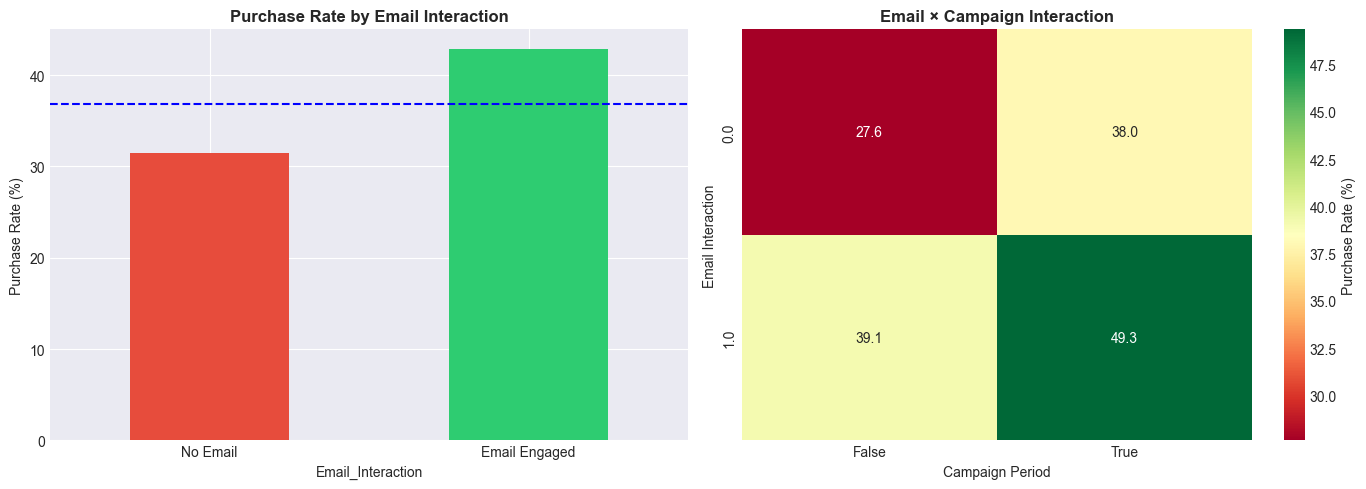


📧 KEY INSIGHT:
   → Email-engaged users have 36.0% higher purchase rate!
   → This is your HIGHEST PRIORITY segment for targeted ads!


In [57]:
# Email interaction is key for targeted marketing!
print("Email Interaction Analysis:")
print("="*60)

email_stats = train_df.groupby('Email_Interaction').agg({
    'Purchase': ['mean', 'count', 'sum']
})
email_stats.columns = ['Purchase_Rate', 'Sessions', 'Total_Purchases']
email_stats['Purchase_Rate'] = email_stats['Purchase_Rate'] * 100
print(email_stats)

# Email during campaign
email_campaign = pd.crosstab(train_df['Email_Interaction'], 
                             train_df['Campaign_Period'], 
                             values=train_df['Purchase'], 
                             aggfunc='mean') * 100

print("\n" + "="*60)
print("Purchase Rate by Email Interaction × Campaign Period:")
print("="*60)
print(email_campaign)

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Purchase rate by email interaction
email_stats['Purchase_Rate'].plot(kind='bar', ax=axes[0], color=['#e74c3c', '#2ecc71'])
axes[0].set_title('Purchase Rate by Email Interaction', fontsize=12, fontweight='bold')
axes[0].set_xticklabels(['No Email', 'Email Engaged'], rotation=0)
axes[0].set_ylabel('Purchase Rate (%)')
axes[0].axhline(y=train_df['Purchase'].mean()*100, color='blue', linestyle='--')

# Heatmap
sns.heatmap(email_campaign, annot=True, fmt='.1f', cmap='RdYlGn', ax=axes[1], 
            cbar_kws={'label': 'Purchase Rate (%)'})
axes[1].set_title('Email × Campaign Interaction', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Campaign Period')
axes[1].set_ylabel('Email Interaction')

plt.tight_layout()
plt.show()

# Key insight
lift_email = (email_stats.loc[1.0, 'Purchase_Rate'] / email_stats.loc[0.0, 'Purchase_Rate'] - 1) * 100
print(f"\n📧 KEY INSIGHT:")
print(f"   → Email-engaged users have {lift_email:.1f}% higher purchase rate!")
print(f"   → This is your HIGHEST PRIORITY segment for targeted ads!")

### CELL 7: Email interaction impact


## 3. Target Variable Analysis

In [58]:
# Purchase rate
purchase_rate = train_df['Purchase'].mean()
print(f"Overall purchase rate: {purchase_rate:.2%}")
print(f"\nPurchase distribution:")
print(train_df['Purchase'].value_counts())
print(f"\nPurchase distribution (%):")
print(train_df['Purchase'].value_counts(normalize=True) * 100)

Overall purchase rate: 36.81%

Purchase distribution:
Purchase
0    8679
1    5056
Name: count, dtype: int64

Purchase distribution (%):
Purchase
0    63.188933
1    36.811067
Name: proportion, dtype: float64


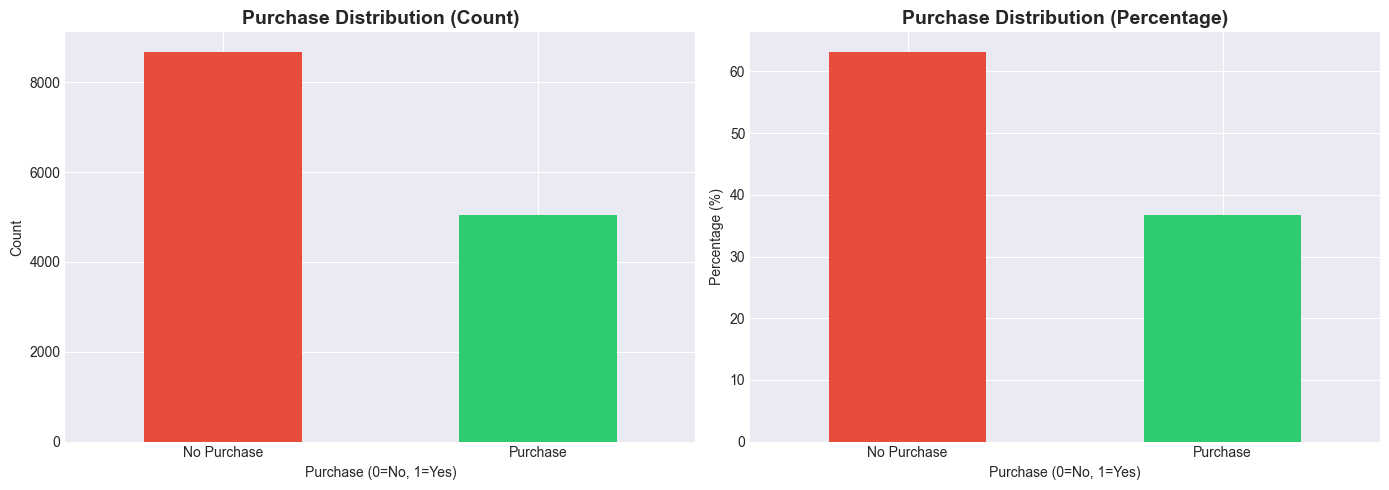


⚠️ Class imbalance: 1.7:1 ratio (No Purchase : Purchase)


In [59]:
# Visualize target distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
train_df['Purchase'].value_counts().plot(kind='bar', ax=axes[0], color=['#e74c3c', '#2ecc71'])
axes[0].set_title('Purchase Distribution (Count)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Purchase (0=No, 1=Yes)')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(['No Purchase', 'Purchase'], rotation=0)

# Percentage plot
(train_df['Purchase'].value_counts(normalize=True) * 100).plot(kind='bar', ax=axes[1], color=['#e74c3c', '#2ecc71'])
axes[1].set_title('Purchase Distribution (Percentage)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Purchase (0=No, 1=Yes)')
axes[1].set_ylabel('Percentage (%)')
axes[1].set_xticklabels(['No Purchase', 'Purchase'], rotation=0)

plt.tight_layout()
plt.show()

print(f"\n⚠️ Class imbalance: {(1 - purchase_rate) / purchase_rate:.1f}:1 ratio (No Purchase : Purchase)")

## 4. Campaign Period Analysis

In [60]:
# Purchase rate by campaign period
campaign_purchase = train_df.groupby('Campaign_Period')['Purchase'].agg(['mean', 'count'])
campaign_purchase.columns = ['Purchase_Rate', 'Count']
campaign_purchase['Purchase_Rate'] = campaign_purchase['Purchase_Rate'] * 100
print("Purchase rate by Campaign Period:")
print(campaign_purchase)

Purchase rate by Campaign Period:
                 Purchase_Rate  Count
Campaign_Period                      
False                32.937441   8504
True                 43.387846   4953


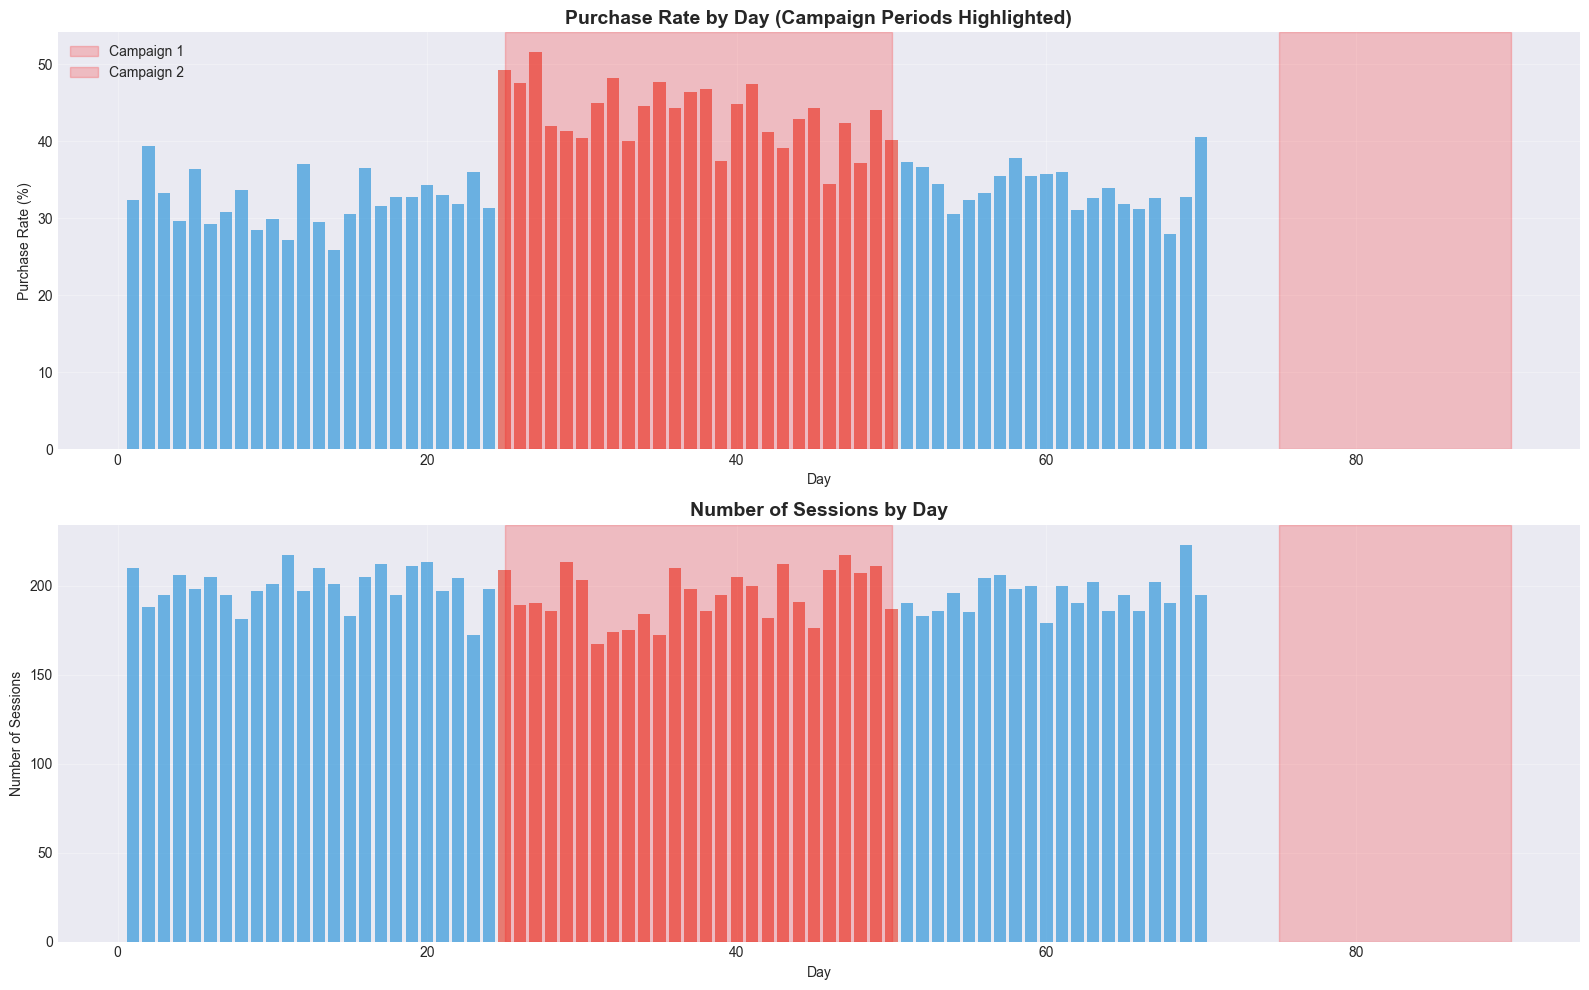

In [61]:
# Purchase rate over days
daily_stats = train_df.groupby('Day').agg({
    'Purchase': ['mean', 'count'],
    'Campaign_Period': 'first'
}).reset_index()
daily_stats.columns = ['Day', 'Purchase_Rate', 'Sessions', 'Campaign_Period']
daily_stats['Purchase_Rate'] = daily_stats['Purchase_Rate'] * 100

# Visualize
fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# Purchase rate by day
colors = ['#e74c3c' if cp else '#3498db' for cp in daily_stats['Campaign_Period']]
axes[0].bar(daily_stats['Day'], daily_stats['Purchase_Rate'], color=colors, alpha=0.7)
axes[0].axvspan(25, 50, alpha=0.2, color='red', label='Campaign 1')
axes[0].axvspan(75, 90, alpha=0.2, color='red', label='Campaign 2')
axes[0].set_title('Purchase Rate by Day (Campaign Periods Highlighted)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Day')
axes[0].set_ylabel('Purchase Rate (%)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Sessions per day
axes[1].bar(daily_stats['Day'], daily_stats['Sessions'], color=colors, alpha=0.7)
axes[1].axvspan(25, 50, alpha=0.2, color='red')
axes[1].axvspan(75, 90, alpha=0.2, color='red')
axes[1].set_title('Number of Sessions by Day', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Day')
axes[1].set_ylabel('Number of Sessions')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 5. Univariate Analysis - Numerical Features

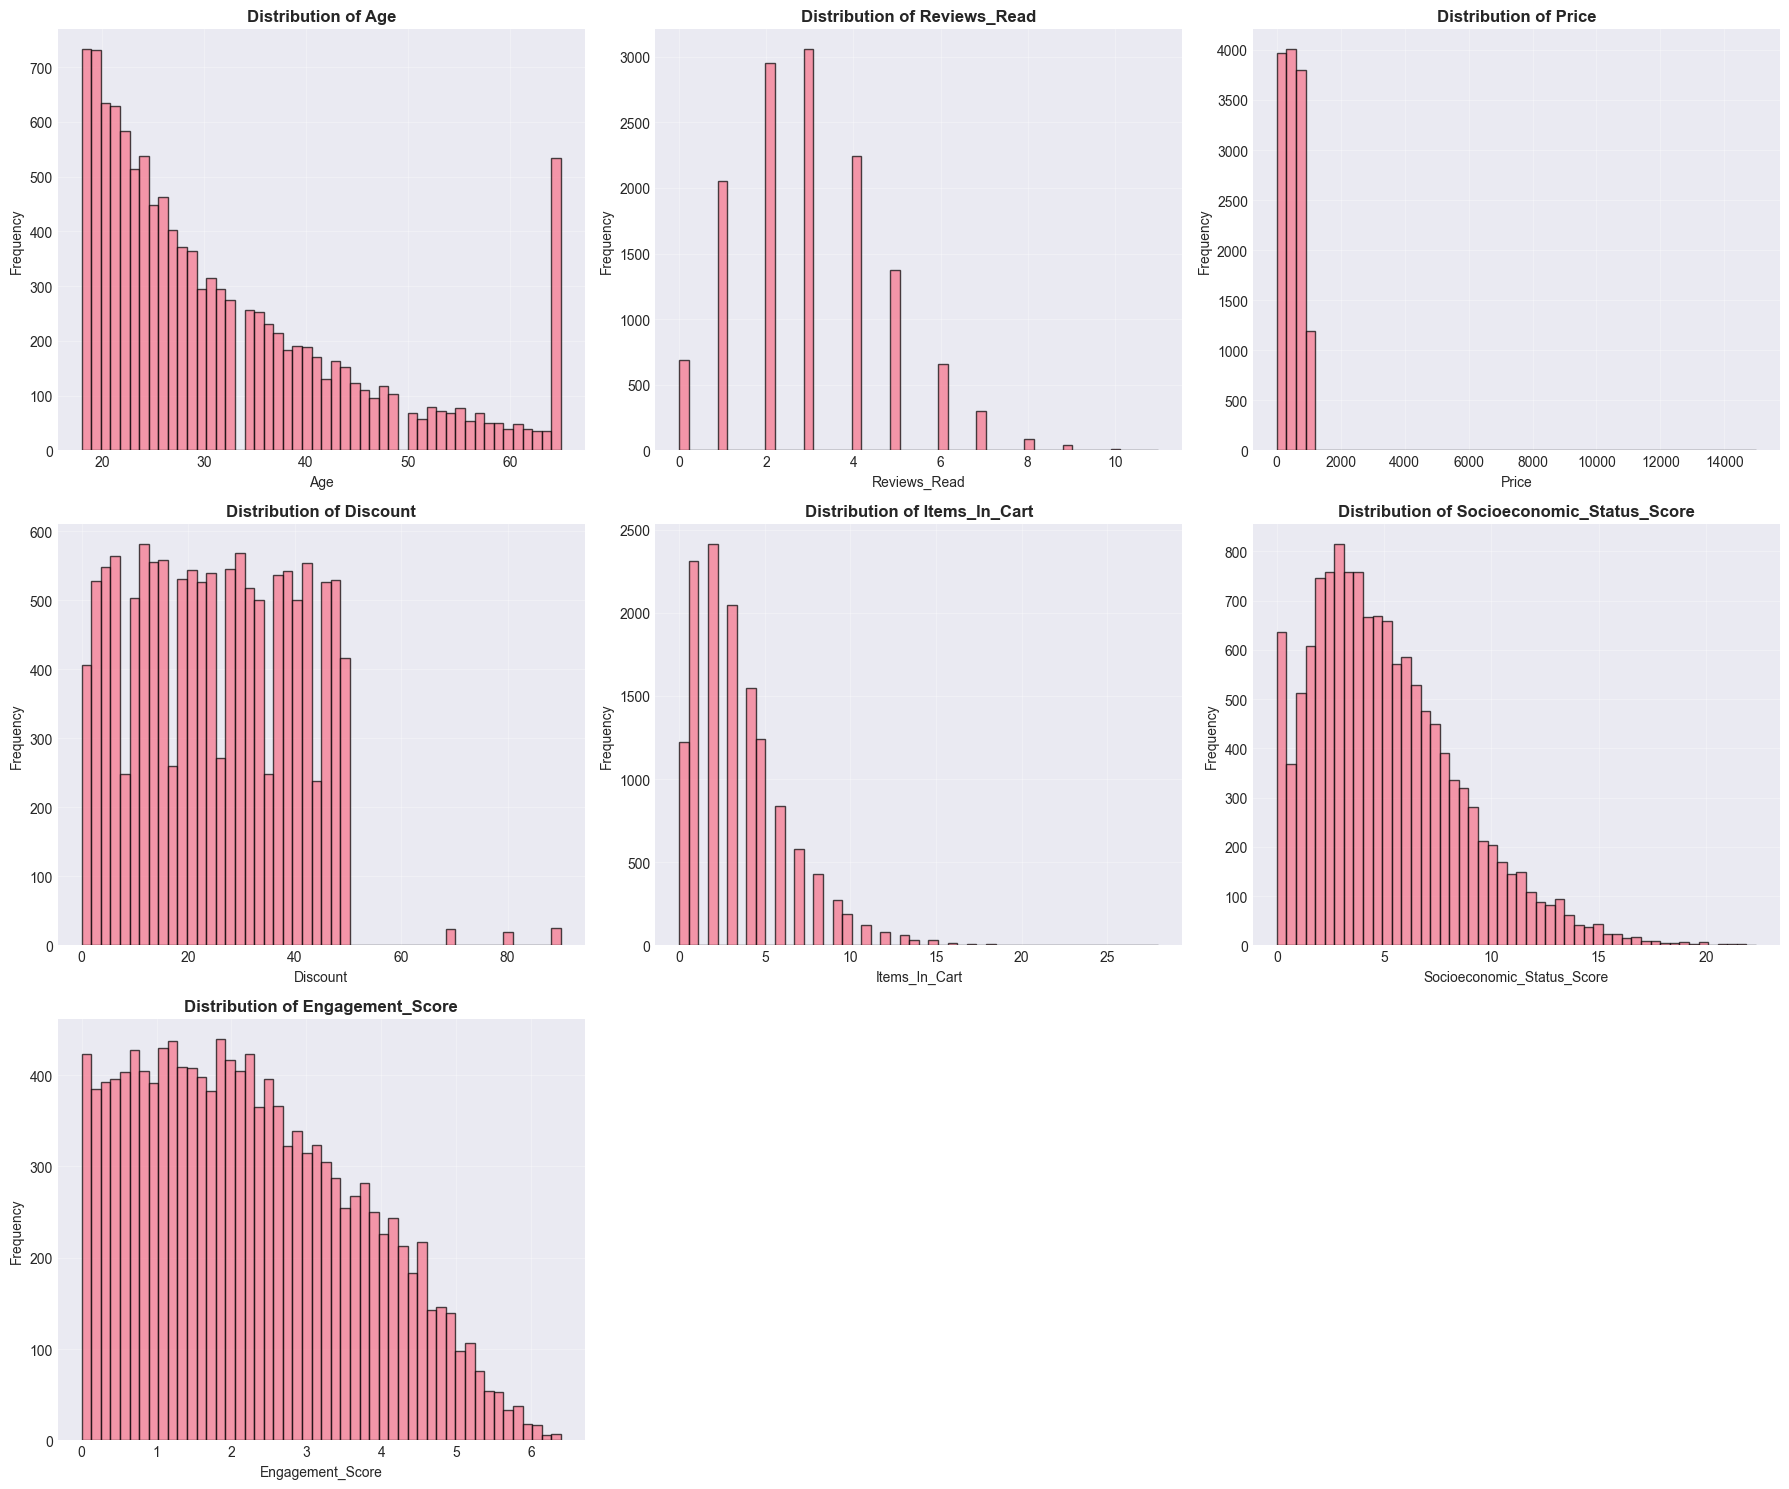

In [62]:
# Identify numerical features
numerical_features = ['Age', 'Reviews_Read', 'Price', 'Discount', 'Items_In_Cart', 
                      'Socioeconomic_Status_Score', 'Engagement_Score']

# Distribution plots
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.ravel()

for idx, col in enumerate(numerical_features):
    axes[idx].hist(train_df[col], bins=50, edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(True, alpha=0.3)

# Remove extra subplots
for idx in range(len(numerical_features), 9):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

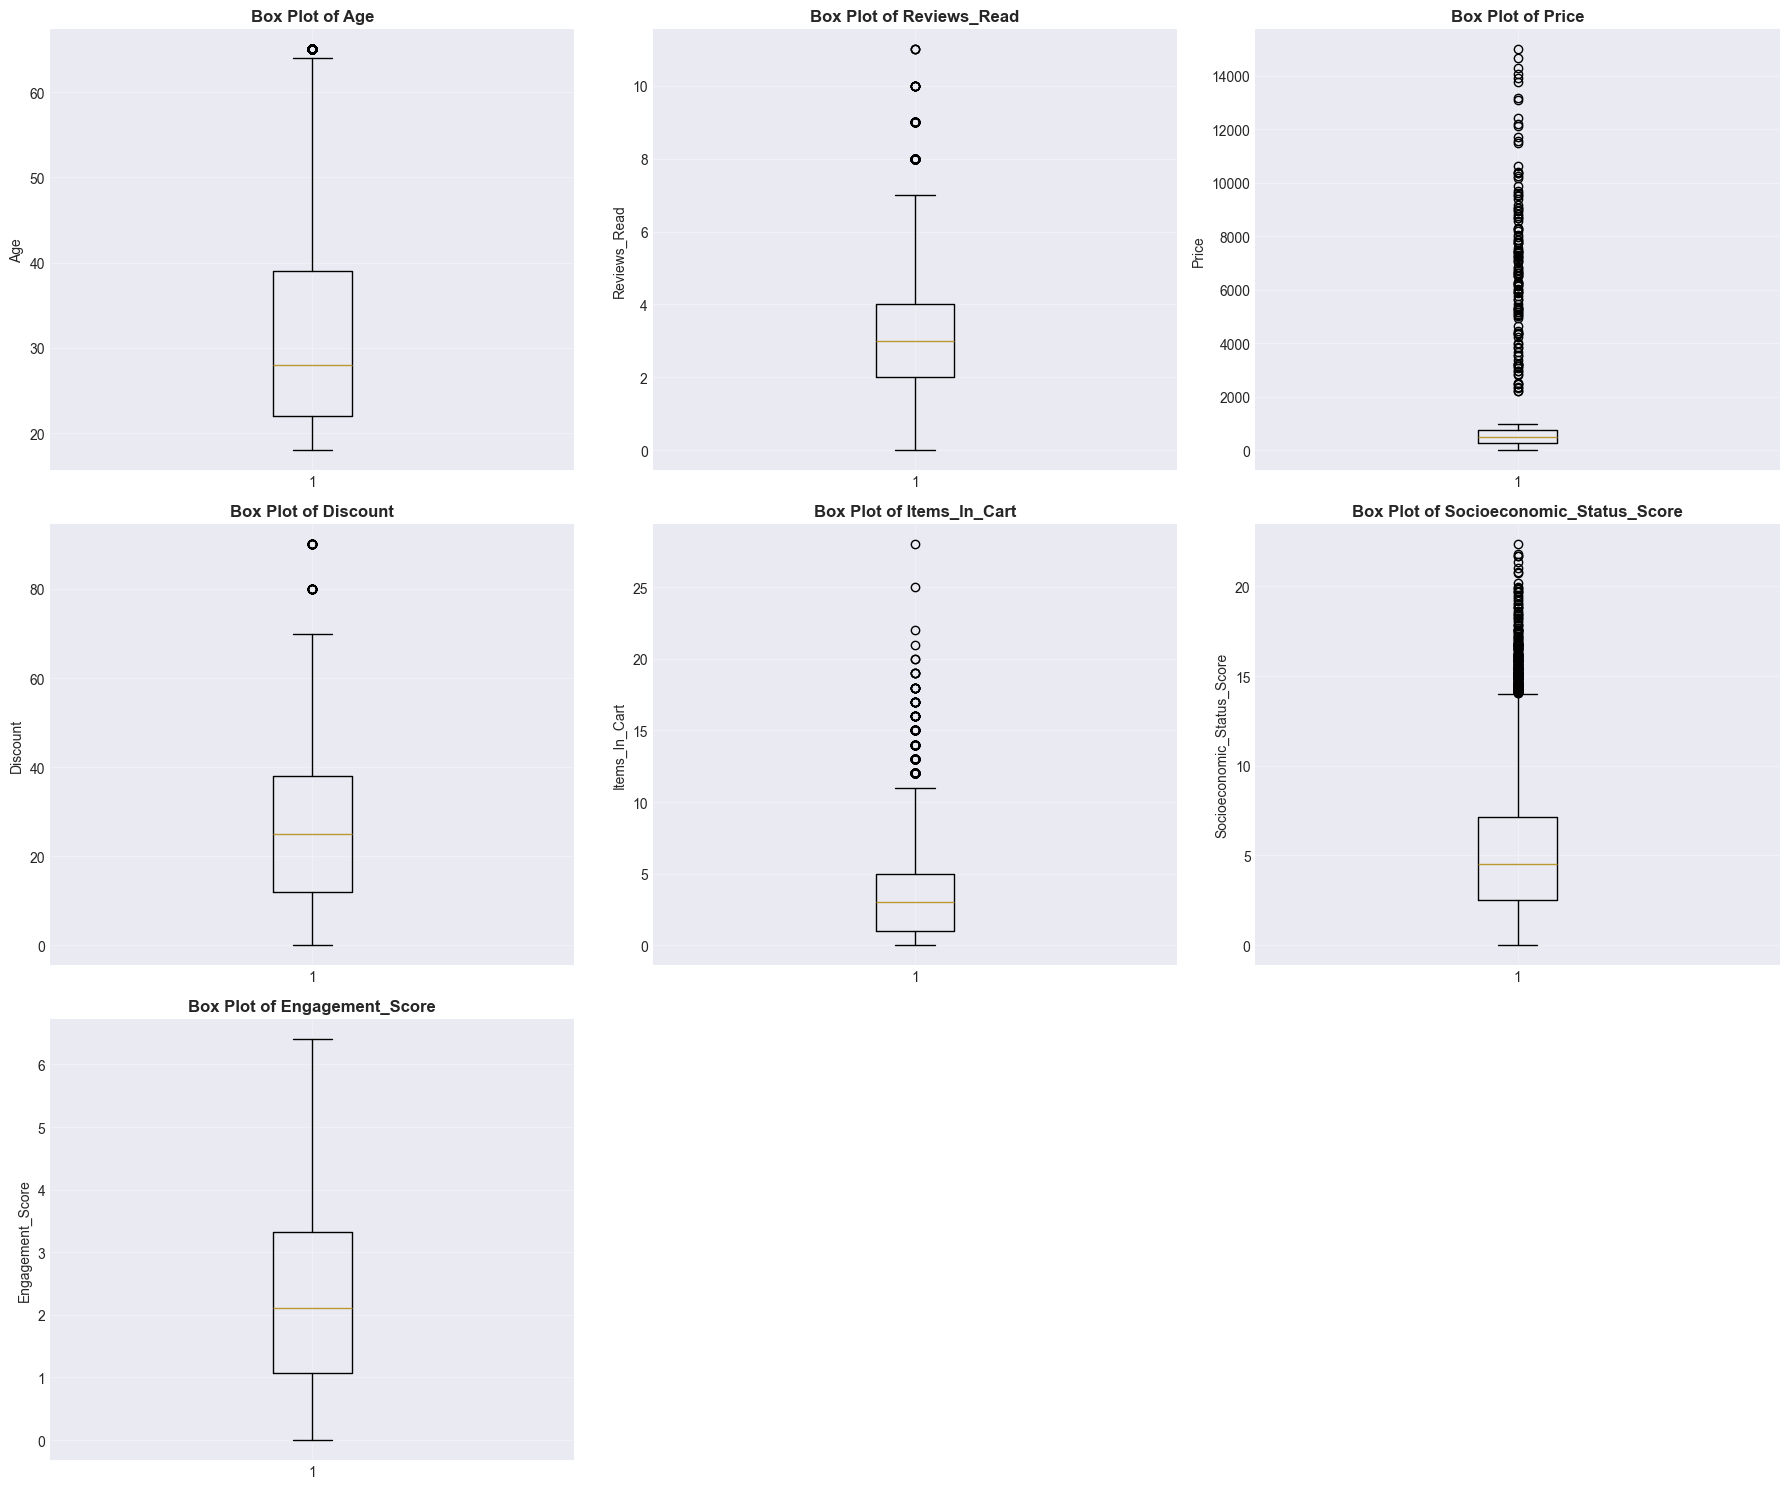

In [63]:
# Box plots to identify outliers
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.ravel()

for idx, col in enumerate(numerical_features):
    axes[idx].boxplot(train_df[col].dropna())
    axes[idx].set_title(f'Box Plot of {col}', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel(col)
    axes[idx].grid(True, alpha=0.3)

for idx in range(len(numerical_features), 9):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

## 6. Univariate Analysis - Categorical Features

In [64]:
# Categorical features
categorical_features = ['Gender', 'Category', 'Time_of_Day', 'Email_Interaction', 
                        'Device_Type', 'Payment_Method', 'Referral_Source']

# Value counts for each categorical feature
for col in categorical_features:
    print(f"\n{'='*60}")
    print(f"{col} - Value Counts:")
    print('='*60)
    print(train_df[col].value_counts())
    print(f"\nPercentage distribution:")
    print(train_df[col].value_counts(normalize=True) * 100)


Gender - Value Counts:
Gender
0.0    6823
1.0    6652
Name: count, dtype: int64

Percentage distribution:
Gender
0.0    50.634508
1.0    49.365492
Name: proportion, dtype: float64

Category - Value Counts:
Category
1.0    2778
4.0    2771
0.0    2690
3.0    2612
2.0    2597
Name: count, dtype: int64

Percentage distribution:
Category
1.0    20.657347
4.0    20.605294
0.0    20.002974
3.0    19.422963
2.0    19.311422
Name: proportion, dtype: float64

Time_of_Day - Value Counts:
Time_of_Day
evening      5334
morning      4039
afternoon    3991
afterno0n       7
eveninG         5
eveniNg         5
Morning         4
eVening         4
eveNing         3
Afternoon       3
moRning         3
evenIng         3
Evening         3
aftern0on       3
evEning         2
afTern0on       2
mOrning         2
m0rning         2
evEnIng         2
morniNg         2
aFtern0on       1
afTErnoon       1
AfTernoOn       1
M0rnInG         1
afternooN       1
AFternoon       1
afTernoOn       1
evEninG         1


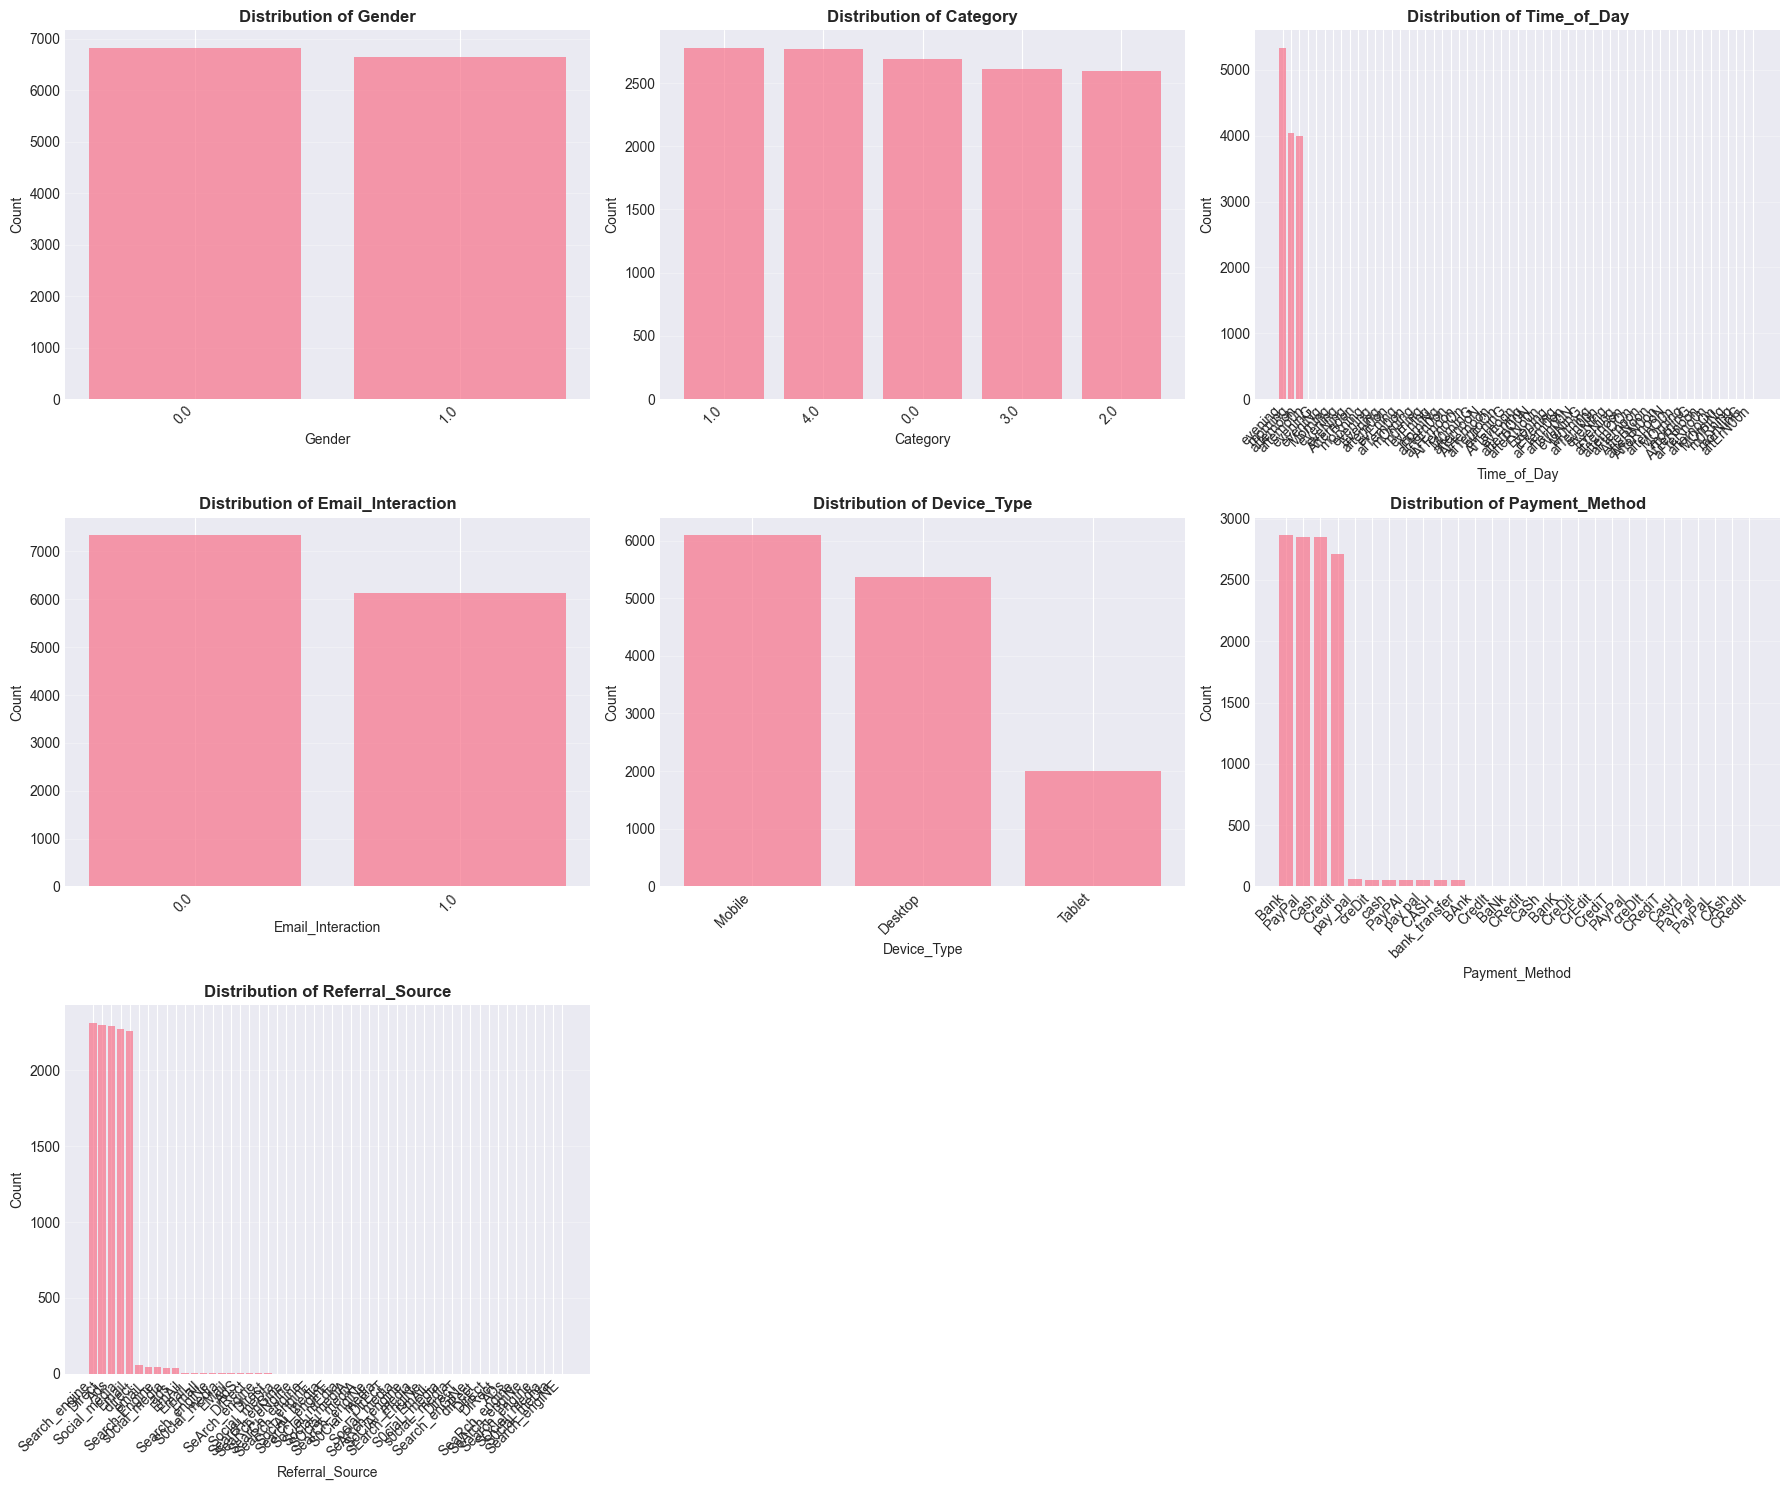

In [65]:
# Visualize categorical distributions
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.ravel()

for idx, col in enumerate(categorical_features):
    value_counts = train_df[col].value_counts()
    axes[idx].bar(range(len(value_counts)), value_counts.values, alpha=0.7)
    axes[idx].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Count')
    axes[idx].set_xticks(range(len(value_counts)))
    axes[idx].set_xticklabels(value_counts.index, rotation=45, ha='right')
    axes[idx].grid(True, alpha=0.3, axis='y')

for idx in range(len(categorical_features), 9):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

## 7. Bivariate Analysis - Features vs Purchase

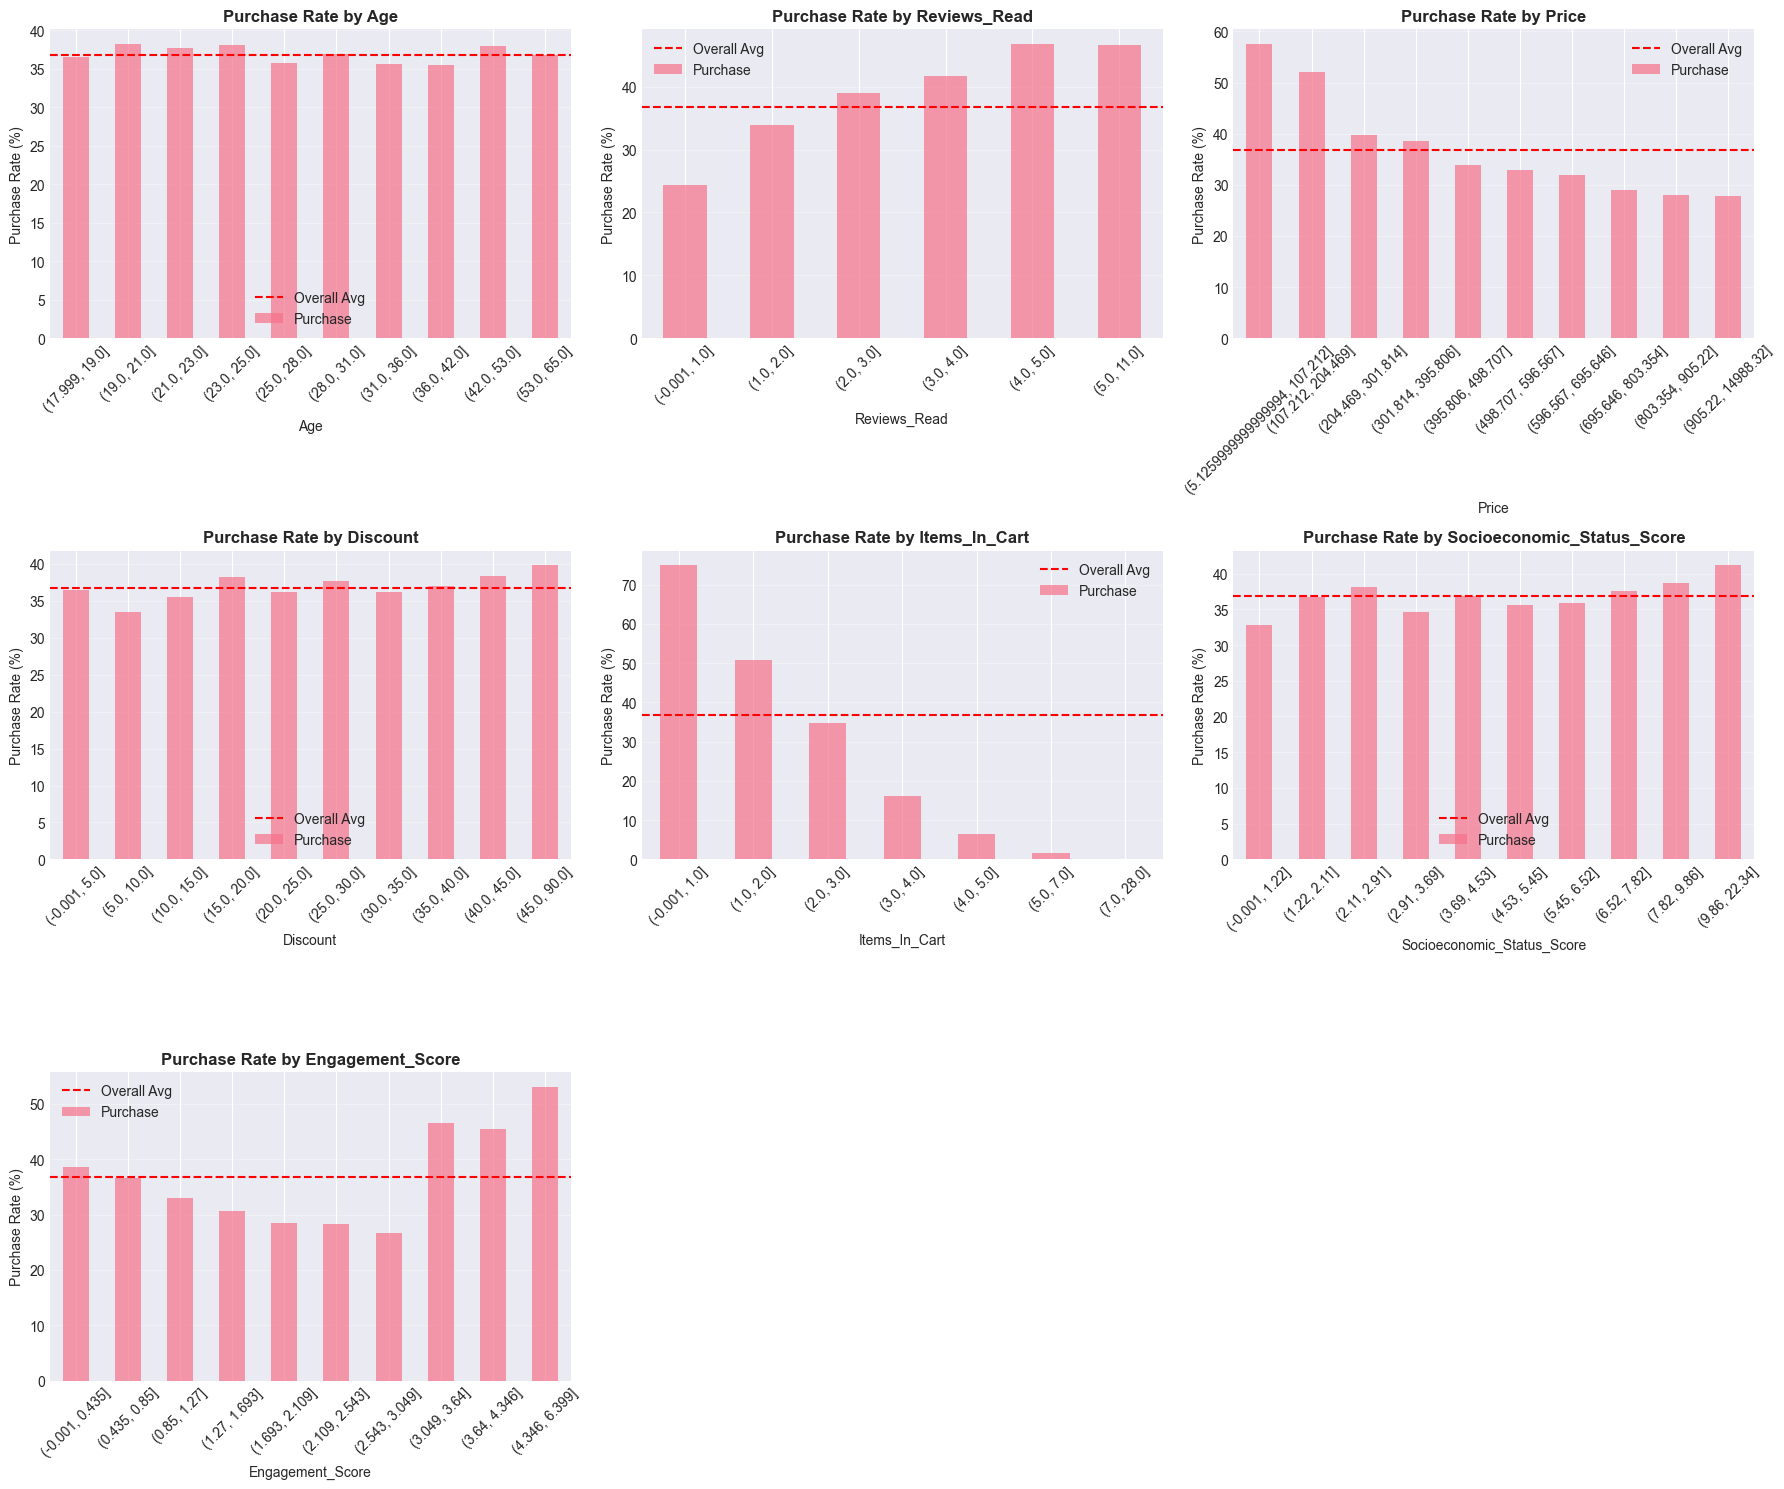

In [66]:
# Purchase rate by numerical features (binned)
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.ravel()

for idx, col in enumerate(numerical_features):
    # Create bins
    train_df[f'{col}_binned'] = pd.qcut(train_df[col], q=10, duplicates='drop')
    
    # Calculate purchase rate by bin
    purchase_by_bin = train_df.groupby(f'{col}_binned')['Purchase'].mean() * 100
    
    # Plot
    purchase_by_bin.plot(kind='bar', ax=axes[idx], alpha=0.7)
    axes[idx].set_title(f'Purchase Rate by {col}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Purchase Rate (%)')
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].grid(True, alpha=0.3, axis='y')
    axes[idx].axhline(y=purchase_rate*100, color='r', linestyle='--', label='Overall Avg')
    axes[idx].legend()
    
    # Drop temporary column
    train_df.drop(f'{col}_binned', axis=1, inplace=True)

for idx in range(len(numerical_features), 9):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

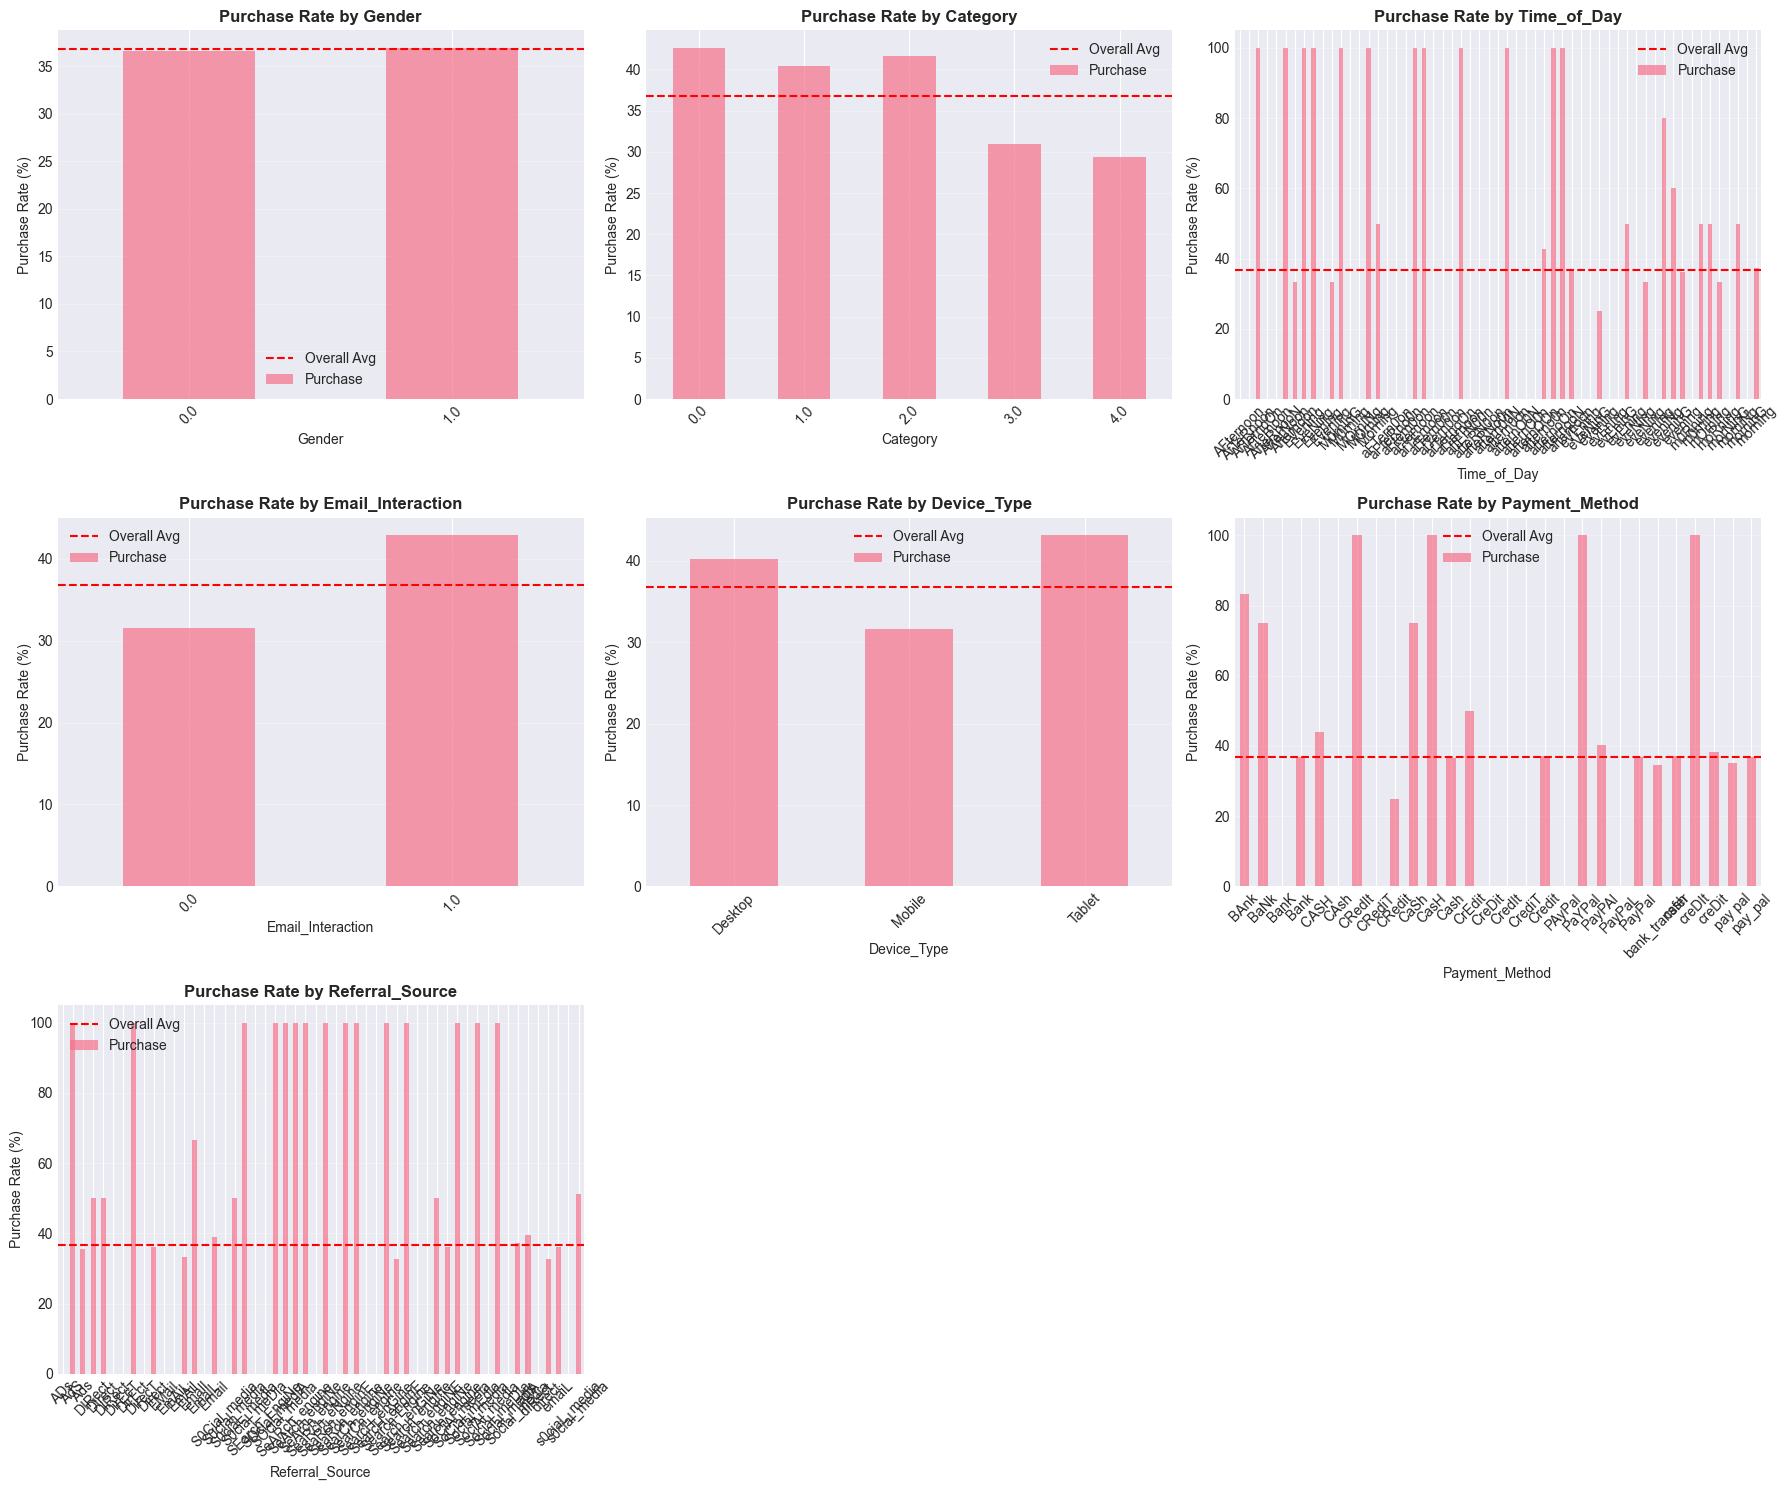

In [67]:
# Purchase rate by categorical features
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.ravel()

for idx, col in enumerate(categorical_features):
    purchase_by_cat = train_df.groupby(col)['Purchase'].mean() * 100
    purchase_by_cat.plot(kind='bar', ax=axes[idx], alpha=0.7)
    axes[idx].set_title(f'Purchase Rate by {col}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Purchase Rate (%)')
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].grid(True, alpha=0.3, axis='y')
    axes[idx].axhline(y=purchase_rate*100, color='r', linestyle='--', label='Overall Avg')
    axes[idx].legend()

for idx in range(len(categorical_features), 9):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

In [68]:
# Statistical tests for categorical features
from scipy.stats import chi2_contingency

print("Chi-square test results for categorical features:")
print("="*70)

for col in categorical_features:
    contingency_table = pd.crosstab(train_df[col], train_df['Purchase'])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    
    print(f"\n{col}:")
    print(f"  Chi-square statistic: {chi2:.4f}")
    print(f"  P-value: {p_value:.4e}")
    print(f"  Significant: {'Yes' if p_value < 0.05 else 'No'}")

Chi-square test results for categorical features:

Gender:
  Chi-square statistic: 0.1135
  P-value: 7.3619e-01
  Significant: No

Category:
  Chi-square statistic: 183.3602
  P-value: 1.4152e-38
  Significant: Yes

Time_of_Day:
  Chi-square statistic: 51.1357
  P-value: 6.5915e-01
  Significant: No

Email_Interaction:
  Chi-square statistic: 184.7512
  P-value: 4.4476e-42
  Significant: Yes

Device_Type:
  Chi-square statistic: 132.0296
  P-value: 2.1387e-29
  Significant: Yes

Payment_Method:
  Chi-square statistic: 29.5357
  P-value: 3.3541e-01
  Significant: No

Referral_Source:
  Chi-square statistic: 55.7212
  P-value: 3.0176e-01
  Significant: No


## 8. Correlation Analysis

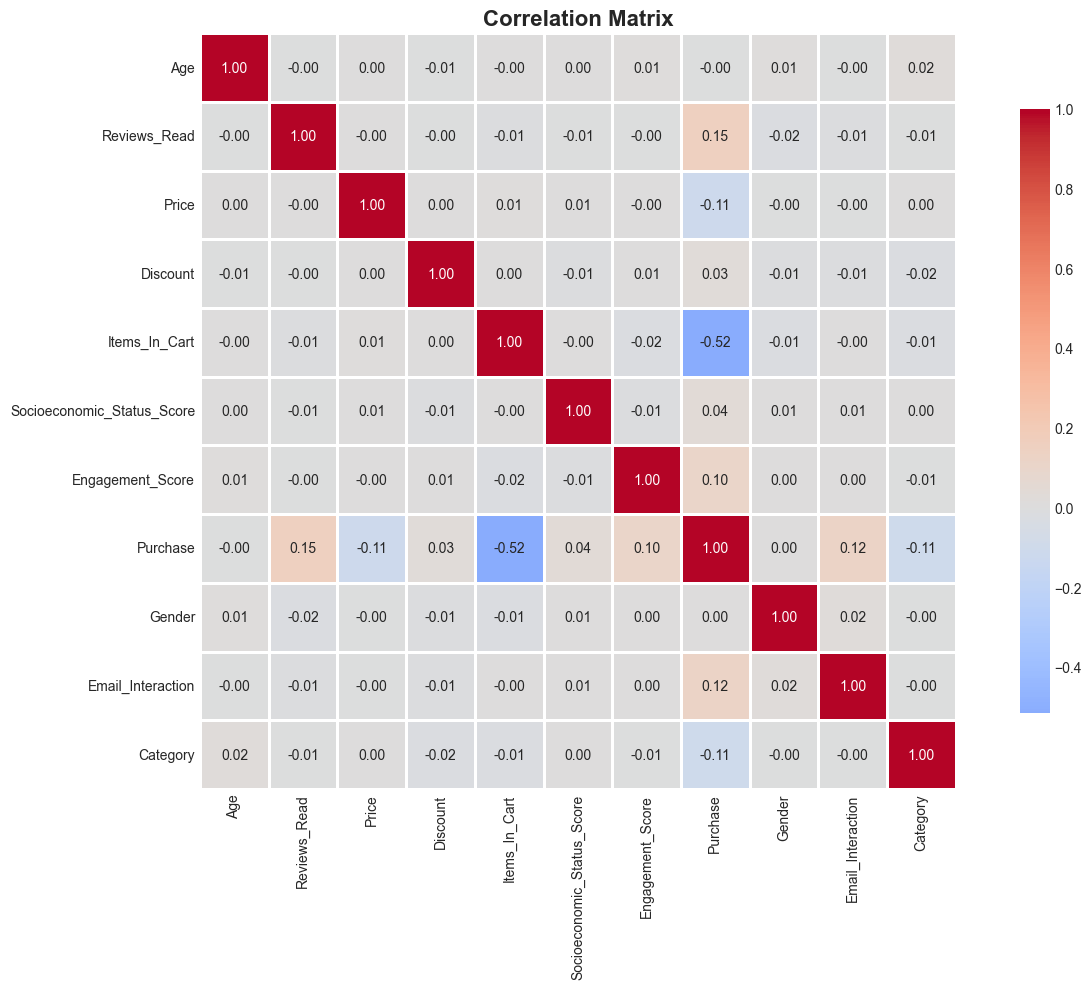

In [69]:
# Correlation matrix for numerical features
correlation_features = numerical_features + ['Purchase', 'Gender', 'Email_Interaction', 'Category']
corr_matrix = train_df[correlation_features].corr()

# Visualize
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [70]:
# Correlation with target variable
target_corr = corr_matrix['Purchase'].sort_values(ascending=False)
print("Correlation with Purchase:")
print("="*40)
print(target_corr)

Correlation with Purchase:
Purchase                      1.000000
Reviews_Read                  0.150997
Email_Interaction             0.117265
Engagement_Score              0.102906
Socioeconomic_Status_Score    0.039314
Discount                      0.025211
Gender                        0.003056
Age                          -0.002816
Category                     -0.105709
Price                        -0.112052
Items_In_Cart                -0.516965
Name: Purchase, dtype: float64


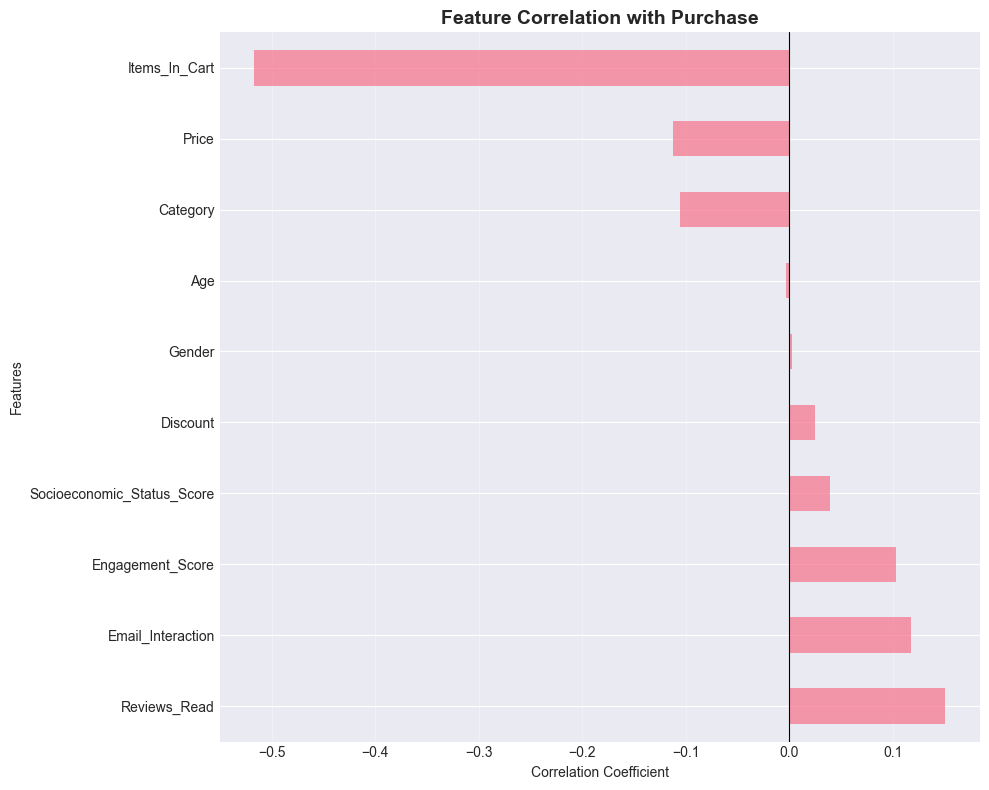

In [71]:
# Visualize correlations with target
plt.figure(figsize=(10, 8))
target_corr.drop('Purchase').plot(kind='barh', alpha=0.7)
plt.title('Feature Correlation with Purchase', fontsize=14, fontweight='bold')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.grid(True, alpha=0.3, axis='x')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
plt.tight_layout()
plt.show()

## 9. Price & Discount Analysis

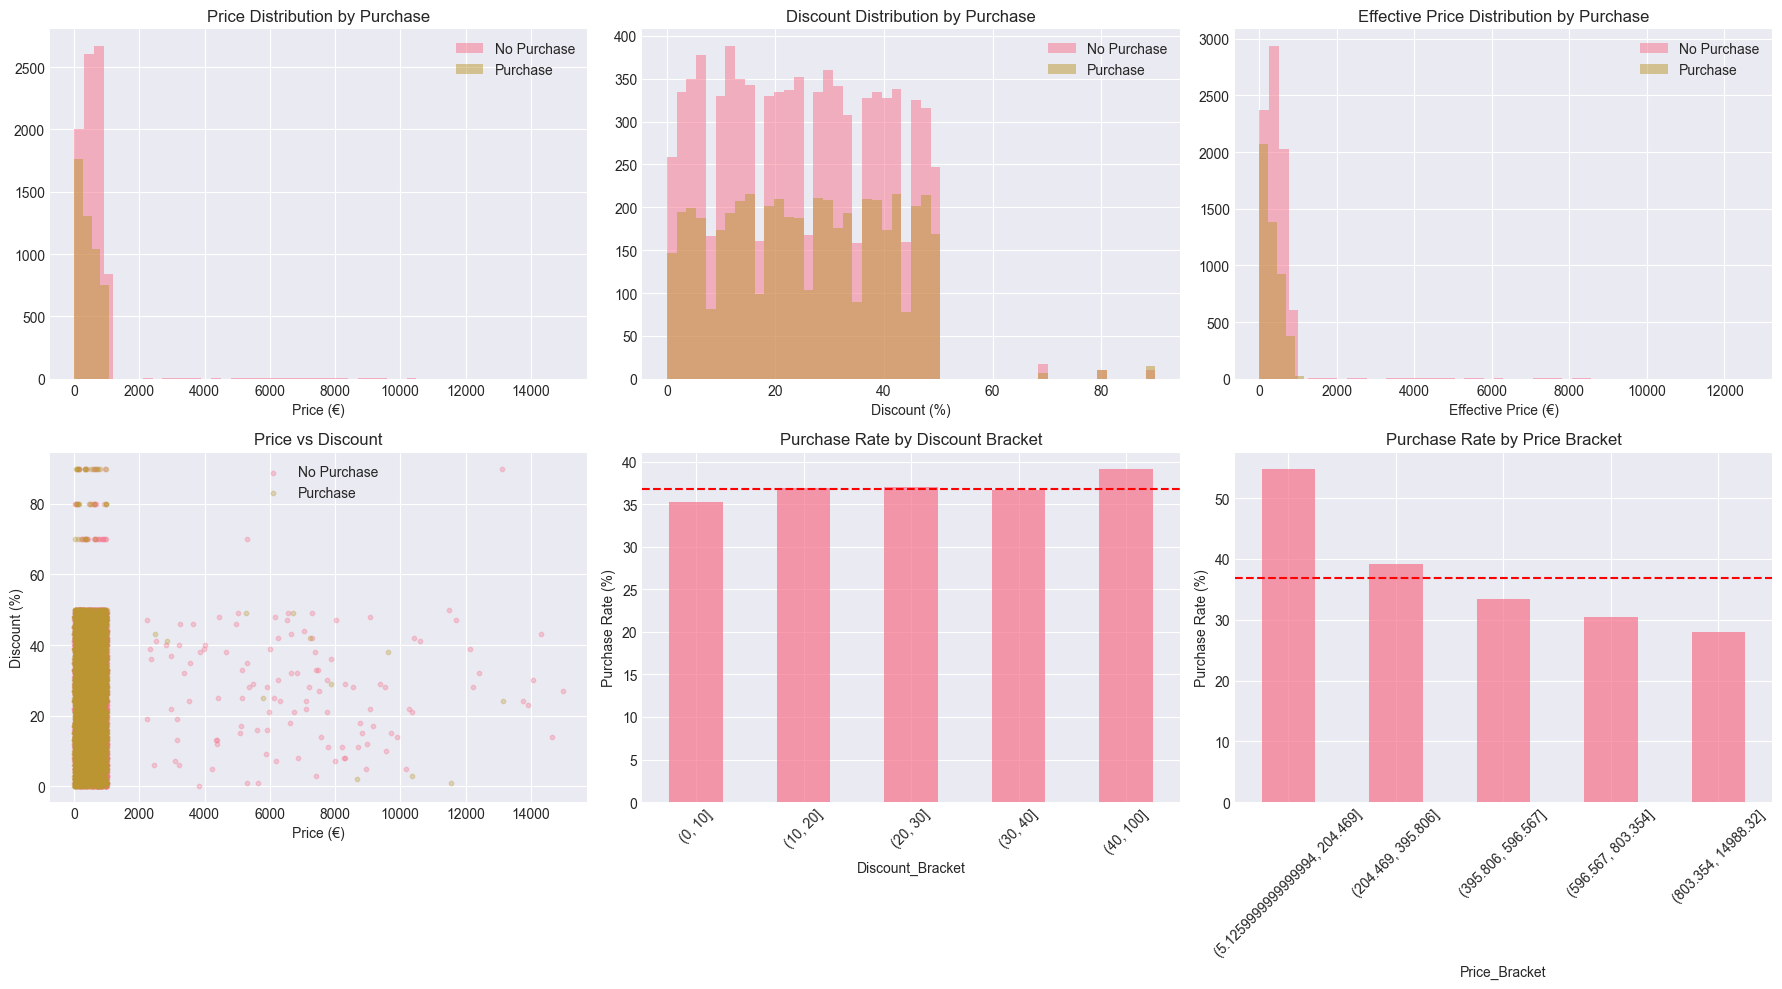

In [72]:
# Effective price (price after discount)
train_df['Effective_Price'] = train_df['Price'] * (1 - train_df['Discount'] / 100)

# Analyze price and discount effects
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Price distribution by purchase
train_df[train_df['Purchase']==0]['Price'].hist(bins=50, alpha=0.5, label='No Purchase', ax=axes[0,0])
train_df[train_df['Purchase']==1]['Price'].hist(bins=50, alpha=0.5, label='Purchase', ax=axes[0,0])
axes[0,0].set_title('Price Distribution by Purchase')
axes[0,0].set_xlabel('Price (€)')
axes[0,0].legend()

# Discount distribution by purchase
train_df[train_df['Purchase']==0]['Discount'].hist(bins=50, alpha=0.5, label='No Purchase', ax=axes[0,1])
train_df[train_df['Purchase']==1]['Discount'].hist(bins=50, alpha=0.5, label='Purchase', ax=axes[0,1])
axes[0,1].set_title('Discount Distribution by Purchase')
axes[0,1].set_xlabel('Discount (%)')
axes[0,1].legend()

# Effective price distribution by purchase
train_df[train_df['Purchase']==0]['Effective_Price'].hist(bins=50, alpha=0.5, label='No Purchase', ax=axes[0,2])
train_df[train_df['Purchase']==1]['Effective_Price'].hist(bins=50, alpha=0.5, label='Purchase', ax=axes[0,2])
axes[0,2].set_title('Effective Price Distribution by Purchase')
axes[0,2].set_xlabel('Effective Price (€)')
axes[0,2].legend()

# Scatter plots
axes[1,0].scatter(train_df[train_df['Purchase']==0]['Price'], 
                  train_df[train_df['Purchase']==0]['Discount'], 
                  alpha=0.3, label='No Purchase', s=10)
axes[1,0].scatter(train_df[train_df['Purchase']==1]['Price'], 
                  train_df[train_df['Purchase']==1]['Discount'], 
                  alpha=0.3, label='Purchase', s=10)
axes[1,0].set_title('Price vs Discount')
axes[1,0].set_xlabel('Price (€)')
axes[1,0].set_ylabel('Discount (%)')
axes[1,0].legend()

# Purchase rate by discount brackets
train_df['Discount_Bracket'] = pd.cut(train_df['Discount'], bins=[0, 10, 20, 30, 40, 100])
discount_purchase = train_df.groupby('Discount_Bracket')['Purchase'].mean() * 100
discount_purchase.plot(kind='bar', ax=axes[1,1], alpha=0.7)
axes[1,1].set_title('Purchase Rate by Discount Bracket')
axes[1,1].set_ylabel('Purchase Rate (%)')
axes[1,1].tick_params(axis='x', rotation=45)
axes[1,1].axhline(y=purchase_rate*100, color='r', linestyle='--')

# Purchase rate by price brackets
train_df['Price_Bracket'] = pd.qcut(train_df['Price'], q=5, duplicates='drop')
price_purchase = train_df.groupby('Price_Bracket')['Purchase'].mean() * 100
price_purchase.plot(kind='bar', ax=axes[1,2], alpha=0.7)
axes[1,2].set_title('Purchase Rate by Price Bracket')
axes[1,2].set_ylabel('Purchase Rate (%)')
axes[1,2].tick_params(axis='x', rotation=45)
axes[1,2].axhline(y=purchase_rate*100, color='r', linestyle='--')

plt.tight_layout()
plt.show()

# Clean up temporary columns
train_df.drop(['Discount_Bracket', 'Price_Bracket'], axis=1, inplace=True)

## 9.5 Core Feature Analysis

DISCOUNT ANALYSIS

Discount Statistics:
count    13462.000000
mean        25.135195
std         14.939578
min          0.000000
25%         12.000000
50%         25.000000
75%         38.000000
max         90.000000
Name: Discount, dtype: float64

Purchase Rate by Discount Level:
                Purchase_Rate  Count   Avg_Price
Discount_Level                                  
0-10%               35.199098   2662  562.807356
10-20%              36.870699   2761  546.742059
20-30%              37.008453   2721  589.496571
30-40%              36.608863   2595  538.077435
40%+                39.095128   2586  567.401798


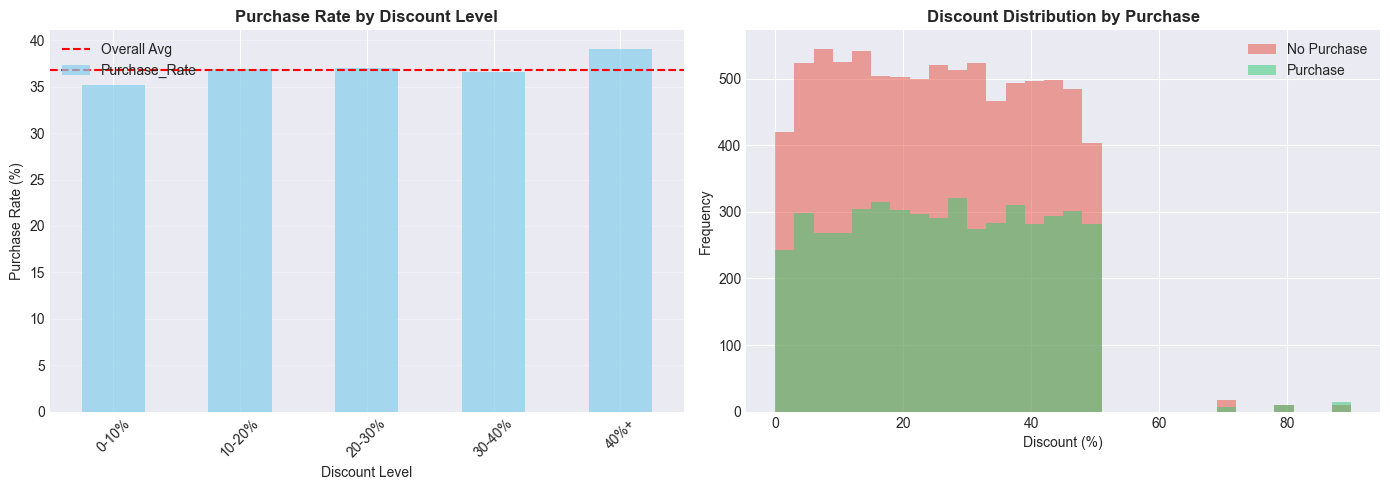

In [73]:
print("="*70)
print("DISCOUNT ANALYSIS")
print("="*70)

# Basic stats
print("\nDiscount Statistics:")
print(train_df['Discount'].describe())

# Purchase rate by discount level
train_df['Discount_Level'] = pd.cut(train_df['Discount'], 
                                     bins=[0, 10, 20, 30, 40, 100],
                                     labels=['0-10%', '10-20%', '20-30%', '30-40%', '40%+'])

discount_analysis = train_df.groupby('Discount_Level').agg({
    'Purchase': ['mean', 'count'],
    'Price': 'mean'
})
discount_analysis.columns = ['Purchase_Rate', 'Count', 'Avg_Price']
discount_analysis['Purchase_Rate'] = discount_analysis['Purchase_Rate'] * 100
print("\nPurchase Rate by Discount Level:")
print(discount_analysis)

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart
discount_analysis['Purchase_Rate'].plot(kind='bar', ax=axes[0], color='skyblue', alpha=0.7)
axes[0].axhline(y=train_df['Purchase'].mean()*100, color='red', linestyle='--', label='Overall Avg')
axes[0].set_title('Purchase Rate by Discount Level', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Purchase Rate (%)')
axes[0].set_xlabel('Discount Level')
axes[0].legend()
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3, axis='y')

# Distribution
train_df[train_df['Purchase']==0]['Discount'].hist(bins=30, alpha=0.5, label='No Purchase', ax=axes[1], color='#e74c3c')
train_df[train_df['Purchase']==1]['Discount'].hist(bins=30, alpha=0.5, label='Purchase', ax=axes[1], color='#2ecc71')
axes[1].set_title('Discount Distribution by Purchase', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Discount (%)')
axes[1].set_ylabel('Frequency')
axes[1].legend()

plt.tight_layout()
plt.show()

# Clean up temp column
train_df.drop('Discount_Level', axis=1, inplace=True)


DEVICE TYPE ANALYSIS

Device Type Distribution:
Device_Type
Mobile     6090
Desktop    5362
Tablet     2005
Name: count, dtype: int64

Percentage:
Device_Type
Mobile     45.255257
Desktop    39.845434
Tablet     14.899309
Name: proportion, dtype: float64

Purchase Rate by Device Type:
             Purchase_Rate  Sessions  Total_Purchases   Avg_Price  \
Device_Type                                                         
Desktop          40.264827      5362             2159  569.995825   
Mobile           31.642036      6090             1927  553.697331   
Tablet           43.142145      2005              865  555.009656   

             Avg_Engagement  
Device_Type                  
Desktop            2.275731  
Mobile             2.265244  
Tablet             2.249349  


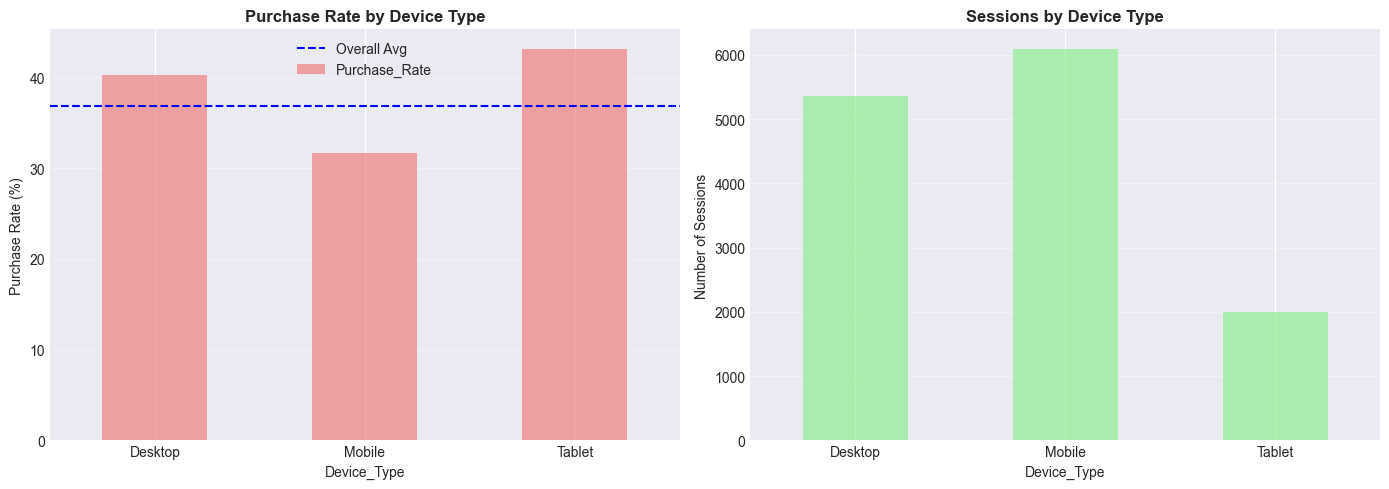

In [74]:
print("\n" + "="*70)
print("DEVICE TYPE ANALYSIS")
print("="*70)

# Device distribution
print("\nDevice Type Distribution:")
print(train_df['Device_Type'].value_counts())
print("\nPercentage:")
print(train_df['Device_Type'].value_counts(normalize=True) * 100)

# Purchase rate by device
device_analysis = train_df.groupby('Device_Type').agg({
    'Purchase': ['mean', 'count', 'sum'],
    'Price': 'mean',
    'Engagement_Score': 'mean'
})
device_analysis.columns = ['Purchase_Rate', 'Sessions', 'Total_Purchases', 'Avg_Price', 'Avg_Engagement']
device_analysis['Purchase_Rate'] = device_analysis['Purchase_Rate'] * 100
print("\nPurchase Rate by Device Type:")
print(device_analysis)

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Purchase rate
device_analysis['Purchase_Rate'].plot(kind='bar', ax=axes[0], color='lightcoral', alpha=0.7)
axes[0].axhline(y=train_df['Purchase'].mean()*100, color='blue', linestyle='--', label='Overall Avg')
axes[0].set_title('Purchase Rate by Device Type', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Purchase Rate (%)')
axes[0].legend()
axes[0].tick_params(axis='x', rotation=0)
axes[0].grid(True, alpha=0.3, axis='y')

# Sessions distribution
device_analysis['Sessions'].plot(kind='bar', ax=axes[1], color='lightgreen', alpha=0.7)
axes[1].set_title('Sessions by Device Type', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Number of Sessions')
axes[1].tick_params(axis='x', rotation=0)
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


REFERRAL SOURCE ANALYSIS

Referral Source Distribution:
Referral_Source
Search_engine    2314
Direct           2296
Ads              2292
Social_media     2270
Email            2258
direct             55
emaiL              47
Search-Engine      46
s0cial_media       39
ads                38
EmAil               6
EmaiL               4
EmaIl               3
Search_engiNe       2
S0cIal_media        2
EMail               2
AdS                 2
DIRect              2
SeArch_engine       2
DIrect              2
Social_meDIa        1
SearcH_enGine       1
SeaRch_eNgine       1
SearCh_engine       1
SeaRch_enginE       1
SociAl_media        1
SearcH_enginE       1
SoCial_mEdia        1
Social_mediA        1
SOcial_mediA        1
SearCh_engiNe       1
S0Cial_media        1
DirEcT              1
SocIal_media        1
SeARch_engine       1
SoCiAl_media        1
SEarch_EngiNe       1
EmAiL               1
S0ciaL_media        1
s0ciaL_media        1
DirecT              1
Search_enGiNe       1
diR

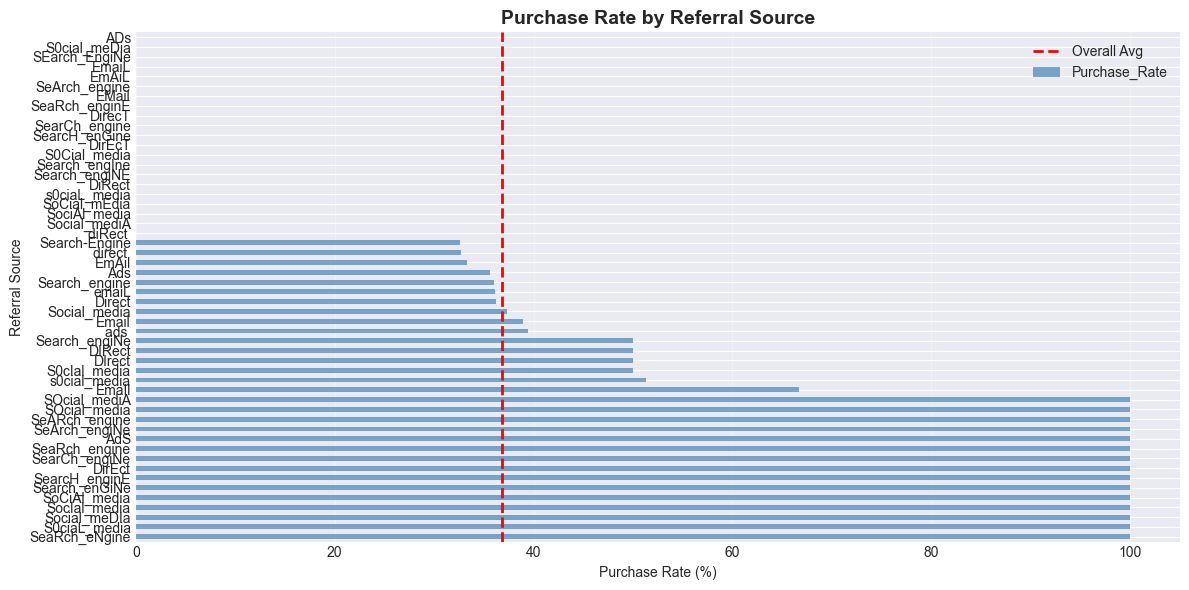

In [75]:
print("\n" + "="*70)
print("REFERRAL SOURCE ANALYSIS")
print("="*70)

# Referral source distribution
print("\nReferral Source Distribution:")
print(train_df['Referral_Source'].value_counts())
print("\nPercentage:")
print(train_df['Referral_Source'].value_counts(normalize=True) * 100)

# Purchase rate by referral source
referral_analysis = train_df.groupby('Referral_Source').agg({
    'Purchase': ['mean', 'count', 'sum'],
    'Email_Interaction': 'mean'
})
referral_analysis.columns = ['Purchase_Rate', 'Sessions', 'Total_Purchases', 'Email_Engaged_Rate']
referral_analysis['Purchase_Rate'] = referral_analysis['Purchase_Rate'] * 100
referral_analysis['Email_Engaged_Rate'] = referral_analysis['Email_Engaged_Rate'] * 100
referral_analysis = referral_analysis.sort_values('Purchase_Rate', ascending=False)
print("\nPurchase Rate by Referral Source:")
print(referral_analysis)

# Visualize
fig, ax = plt.subplots(figsize=(12, 6))
referral_analysis['Purchase_Rate'].plot(kind='barh', ax=ax, color='steelblue', alpha=0.7)
ax.axvline(x=train_df['Purchase'].mean()*100, color='red', linestyle='--', linewidth=2, label='Overall Avg')
ax.set_title('Purchase Rate by Referral Source', fontsize=14, fontweight='bold')
ax.set_xlabel('Purchase Rate (%)')
ax.set_ylabel('Referral Source')
ax.legend()
ax.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()


REVIEWS READ ANALYSIS

Reviews Read Statistics:
count    13444.000000
mean         2.985049
std          1.723548
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         11.000000
Name: Reviews_Read, dtype: float64

Purchase Rate by Reviews Read:
                 Purchase_Rate  Count  Avg_Engagement
Review_Category                                      
None                 17.758370    687        2.351970
1-2                  30.898539   4997        2.262943
3-4                  40.128472   5293        2.249703
5+                   46.696392   2467        2.266629


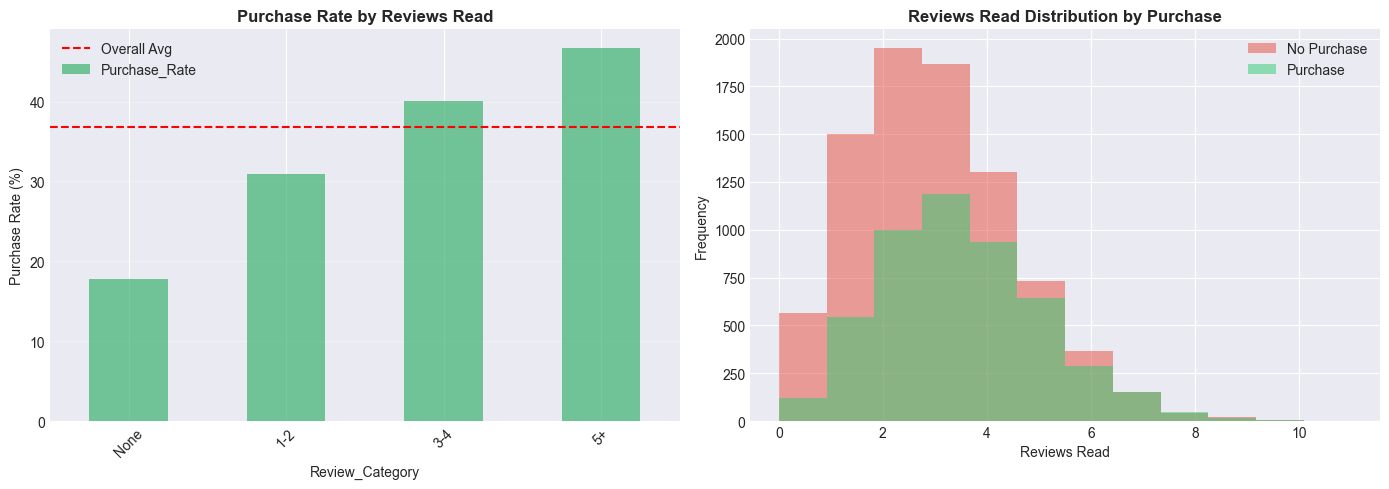

In [76]:
print("\n" + "="*70)
print("REVIEWS READ ANALYSIS")
print("="*70)

# Basic stats
print("\nReviews Read Statistics:")
print(train_df['Reviews_Read'].describe())

# Purchase rate by review engagement
train_df['Review_Category'] = pd.cut(train_df['Reviews_Read'], 
                                      bins=[-1, 0, 2, 4, 11],
                                      labels=['None', '1-2', '3-4', '5+'])

review_analysis = train_df.groupby('Review_Category').agg({
    'Purchase': ['mean', 'count'],
    'Engagement_Score': 'mean'
})
review_analysis.columns = ['Purchase_Rate', 'Count', 'Avg_Engagement']
review_analysis['Purchase_Rate'] = review_analysis['Purchase_Rate'] * 100
print("\nPurchase Rate by Reviews Read:")
print(review_analysis)

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart
review_analysis['Purchase_Rate'].plot(kind='bar', ax=axes[0], color='mediumseagreen', alpha=0.7)
axes[0].axhline(y=train_df['Purchase'].mean()*100, color='red', linestyle='--', label='Overall Avg')
axes[0].set_title('Purchase Rate by Reviews Read', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Purchase Rate (%)')
axes[0].legend()
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3, axis='y')

# Distribution
train_df[train_df['Purchase']==0]['Reviews_Read'].hist(bins=12, alpha=0.5, label='No Purchase', ax=axes[1], color='#e74c3c')
train_df[train_df['Purchase']==1]['Reviews_Read'].hist(bins=12, alpha=0.5, label='Purchase', ax=axes[1], color='#2ecc71')
axes[1].set_title('Reviews Read Distribution by Purchase', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Reviews Read')
axes[1].set_ylabel('Frequency')
axes[1].legend()

plt.tight_layout()
plt.show()

# Clean up
train_df.drop('Review_Category', axis=1, inplace=True)


ITEMS IN CART ANALYSIS

Items in Cart Statistics:
count    13455.000000
mean         3.515199
std          2.864808
min          0.000000
25%          1.000000
50%          3.000000
75%          5.000000
max         28.000000
Name: Items_In_Cart, dtype: float64

Purchase Rate by Items in Cart:
               Purchase_Rate  Count   Avg_Price
Cart_Category                                  
Empty              85.012285   1221  534.310567
1-2                60.016942   4722  561.097621
3-5                21.551189   4835  561.602968
6+                  0.933881   2677  572.244554


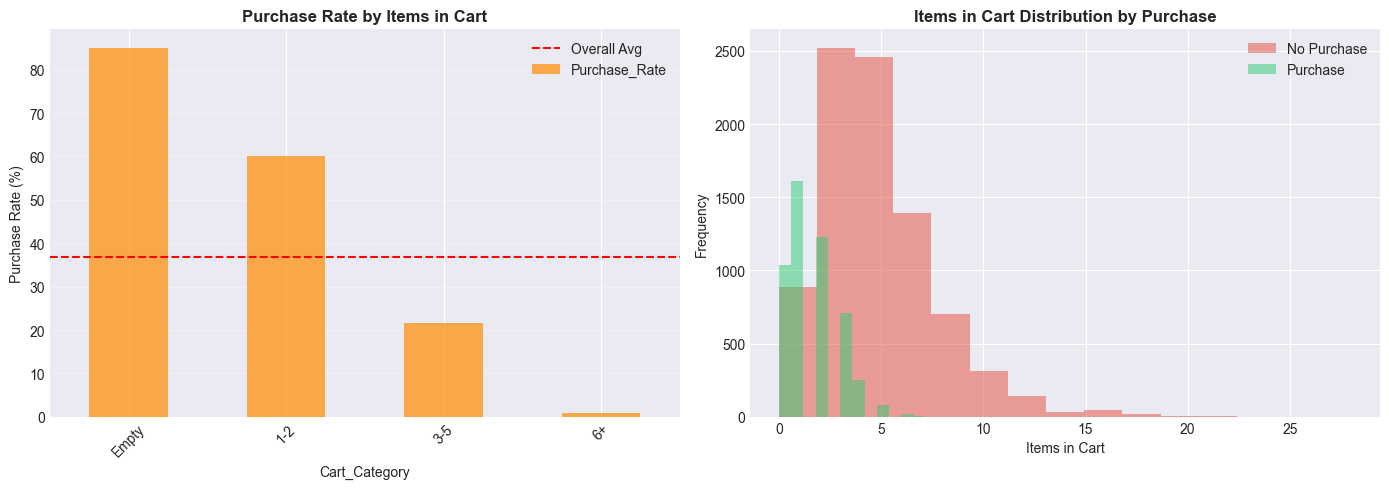

In [77]:
print("\n" + "="*70)
print("ITEMS IN CART ANALYSIS")
print("="*70)

# Basic stats
print("\nItems in Cart Statistics:")
print(train_df['Items_In_Cart'].describe())

# Purchase rate by cart items
train_df['Cart_Category'] = pd.cut(train_df['Items_In_Cart'], 
                                    bins=[-1, 0, 2, 5, 30],
                                    labels=['Empty', '1-2', '3-5', '6+'])

cart_analysis = train_df.groupby('Cart_Category').agg({
    'Purchase': ['mean', 'count'],
    'Price': 'mean'
})
cart_analysis.columns = ['Purchase_Rate', 'Count', 'Avg_Price']
cart_analysis['Purchase_Rate'] = cart_analysis['Purchase_Rate'] * 100
print("\nPurchase Rate by Items in Cart:")
print(cart_analysis)

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart
cart_analysis['Purchase_Rate'].plot(kind='bar', ax=axes[0], color='darkorange', alpha=0.7)
axes[0].axhline(y=train_df['Purchase'].mean()*100, color='red', linestyle='--', label='Overall Avg')
axes[0].set_title('Purchase Rate by Items in Cart', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Purchase Rate (%)')
axes[0].legend()
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3, axis='y')

# Distribution
train_df[train_df['Purchase']==0]['Items_In_Cart'].hist(bins=15, alpha=0.5, label='No Purchase', ax=axes[1], color='#e74c3c')
train_df[train_df['Purchase']==1]['Items_In_Cart'].hist(bins=15, alpha=0.5, label='Purchase', ax=axes[1], color='#2ecc71')
axes[1].set_title('Items in Cart Distribution by Purchase', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Items in Cart')
axes[1].set_ylabel('Frequency')
axes[1].legend()

plt.tight_layout()
plt.show()

# Clean up
train_df.drop('Cart_Category', axis=1, inplace=True)


PRODUCT CATEGORY ANALYSIS

Category Distribution:
Category
0.0    2690
1.0    2778
2.0    2597
3.0    2612
4.0    2771
Name: count, dtype: int64

Percentage:
Category
0.0    20.002974
1.0    20.657347
2.0    19.311422
3.0    19.422963
4.0    20.605294
Name: proportion, dtype: float64

Purchase Rate by Category:
          Purchase_Rate  Sessions  Total_Purchases   Avg_Price  Avg_Discount
Category                                                                    
0.0           42.602230      2690             1146  561.570166     25.320669
1.0           40.388769      2778             1122  557.119453     25.512491
2.0           41.586446      2597             1080  556.803185     25.055316
3.0           31.010720      2612              810  560.359498     24.859758
4.0           29.339589      2771              813  566.622006     24.761536


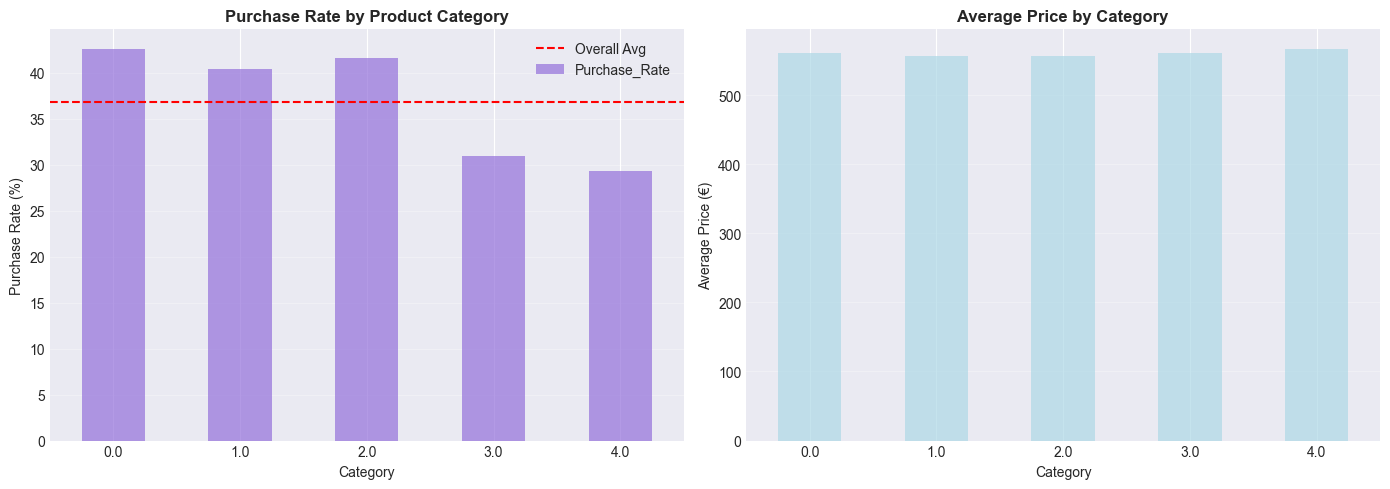

In [78]:
print("\n" + "="*70)
print("PRODUCT CATEGORY ANALYSIS")
print("="*70)

# Category distribution
print("\nCategory Distribution:")
print(train_df['Category'].value_counts().sort_index())
print("\nPercentage:")
print(train_df['Category'].value_counts(normalize=True).sort_index() * 100)

# Purchase rate by category
category_analysis = train_df.groupby('Category').agg({
    'Purchase': ['mean', 'count', 'sum'],
    'Price': 'mean',
    'Discount': 'mean'
})
category_analysis.columns = ['Purchase_Rate', 'Sessions', 'Total_Purchases', 'Avg_Price', 'Avg_Discount']
category_analysis['Purchase_Rate'] = category_analysis['Purchase_Rate'] * 100
print("\nPurchase Rate by Category:")
print(category_analysis)

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Purchase rate
category_analysis['Purchase_Rate'].plot(kind='bar', ax=axes[0], color='mediumpurple', alpha=0.7)
axes[0].axhline(y=train_df['Purchase'].mean()*100, color='red', linestyle='--', label='Overall Avg')
axes[0].set_title('Purchase Rate by Product Category', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Purchase Rate (%)')
axes[0].set_xlabel('Category')
axes[0].legend()
axes[0].tick_params(axis='x', rotation=0)
axes[0].grid(True, alpha=0.3, axis='y')

# Average price by category
category_analysis['Avg_Price'].plot(kind='bar', ax=axes[1], color='lightblue', alpha=0.7)
axes[1].set_title('Average Price by Category', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Average Price (€)')
axes[1].set_xlabel('Category')
axes[1].tick_params(axis='x', rotation=0)
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


AB_BUCKET ANALYSIS

AB_Bucket Distribution:
AB_Bucket
0.0    1919
1.0    1897
2.0    1924
3.0    1932
4.0    1943
5.0    1904
6.0    1947
Name: count, dtype: int64

Purchase Rate by AB_Bucket:
           Purchase_Rate  Sessions  Total_Purchases  Email_Rate  Avg_Discount
AB_Bucket                                                                    
0.0            37.206879      1919              714   45.778014     25.151033
1.0            37.216658      1897              706   45.096983     25.348013
2.0            36.382536      1924              700   44.120763     24.864407
3.0            37.629400      1932              727   46.526316     25.021175
4.0            34.534225      1943              671   45.244351     25.542542
5.0            37.342437      1904              711   45.869099     25.049172
6.0            37.134052      1947              723   46.001045     25.188192


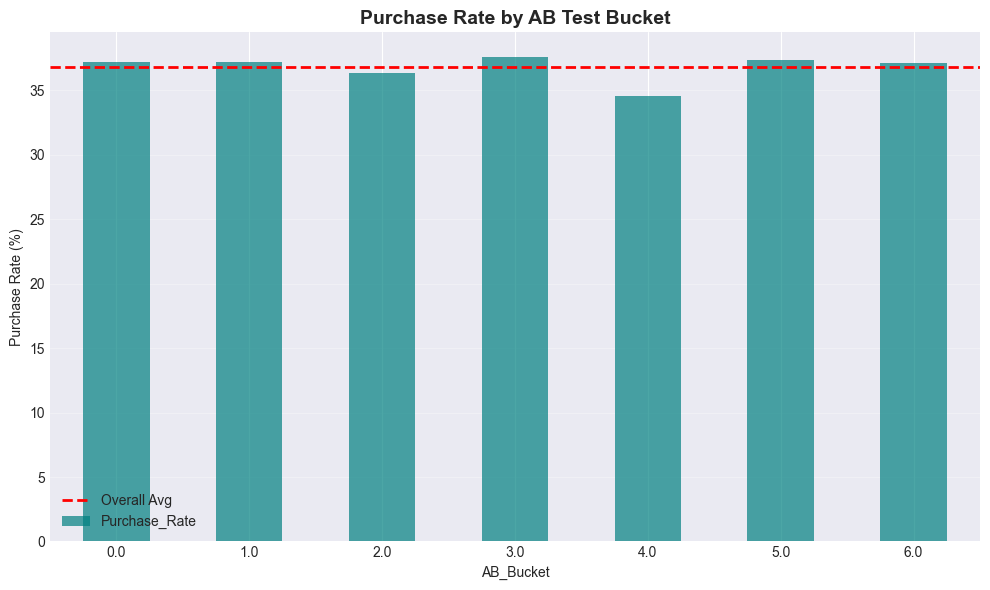


💡 INSIGHT:
   Best performing bucket: 3.0 (37.6%)
   Worst performing bucket: 4.0 (34.5%)


In [79]:
print("\n" + "="*70)
print("AB_BUCKET ANALYSIS")
print("="*70)

# AB_Bucket distribution
print("\nAB_Bucket Distribution:")
print(train_df['AB_Bucket'].value_counts().sort_index())

# Purchase rate by AB bucket
ab_analysis = train_df.groupby('AB_Bucket').agg({
    'Purchase': ['mean', 'count', 'sum'],
    'Email_Interaction': 'mean',
    'Discount': 'mean'
})
ab_analysis.columns = ['Purchase_Rate', 'Sessions', 'Total_Purchases', 'Email_Rate', 'Avg_Discount']
ab_analysis['Purchase_Rate'] = ab_analysis['Purchase_Rate'] * 100
ab_analysis['Email_Rate'] = ab_analysis['Email_Rate'] * 100
print("\nPurchase Rate by AB_Bucket:")
print(ab_analysis)

# Visualize
fig, ax = plt.subplots(figsize=(10, 6))
ab_analysis['Purchase_Rate'].plot(kind='bar', ax=ax, color='teal', alpha=0.7)
ax.axhline(y=train_df['Purchase'].mean()*100, color='red', linestyle='--', linewidth=2, label='Overall Avg')
ax.set_title('Purchase Rate by AB Test Bucket', fontsize=14, fontweight='bold')
ax.set_ylabel('Purchase Rate (%)')
ax.set_xlabel('AB_Bucket')
ax.legend()
ax.tick_params(axis='x', rotation=0)
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print("\n💡 INSIGHT:")
best_bucket = ab_analysis['Purchase_Rate'].idxmax()
worst_bucket = ab_analysis['Purchase_Rate'].idxmin()
print(f"   Best performing bucket: {best_bucket} ({ab_analysis.loc[best_bucket, 'Purchase_Rate']:.1f}%)")
print(f"   Worst performing bucket: {worst_bucket} ({ab_analysis.loc[worst_bucket, 'Purchase_Rate']:.1f}%)")

## 10. Feature Engineering

### 10.1 Price-Related Features

In [80]:
def create_price_features(df):
    """
    Create features related to price and discount
    """
    df = df.copy()
    
    # Effective price after discount
    df['Effective_Price'] = df['Price'] * (1 - df['Discount'] / 100)
    
    # Discount amount in euros
    df['Discount_Amount'] = df['Price'] * df['Discount'] / 100
    
    # Price per item in cart
    df['Price_Per_Item'] = df['Price'] / (df['Items_In_Cart'] + 1)  # +1 to avoid division by zero
    
    # Binary: High discount (>30%)
    df['High_Discount'] = (df['Discount'] > 30).astype(int)
    
    # Binary: Has discount
    df['Has_Discount'] = (df['Discount'] > 0).astype(int)
    
    # Price categories
    df['Price_Category'] = pd.cut(df['Price'], 
                                   bins=[0, 50, 200, 500, 10000], 
                                   labels=['Low', 'Medium', 'High', 'Premium'])
    
    return df

# Test the function
train_with_price_features = create_price_features(train_df)
print("New price-related features created:")
print(train_with_price_features[['Price', 'Discount', 'Effective_Price', 'Discount_Amount', 
                                  'Price_Per_Item', 'High_Discount', 'Has_Discount', 'Price_Category']].head())

New price-related features created:
     Price  Discount  Effective_Price  Discount_Amount  Price_Per_Item  \
0  592.975      22.0        462.52050        130.45450       84.710714   
1  511.279      12.0        449.92552         61.35348      127.819750   
2  218.360       2.0        213.99280          4.36720       43.672000   
3  313.781       1.0        310.64319          3.13781      313.781000   
4  495.088      13.0        430.72656         64.36144      165.029333   

   High_Discount  Has_Discount Price_Category  
0              0             1        Premium  
1              0             1        Premium  
2              0             1           High  
3              0             1           High  
4              0             1           High  


### 10.2 Engagement & Behavior Features

In [81]:
def create_engagement_features(df):
    """
    Create features related to user engagement and behavior
    """
    df = df.copy()
    
    # Reviews engagement
    df['Reviews_Engaged'] = (df['Reviews_Read'] > 0).astype(int)
    df['Heavy_Reviewer'] = (df['Reviews_Read'] > df['Reviews_Read'].median()).astype(int)
    
    # Cart engagement
    df['Has_Items_In_Cart'] = (df['Items_In_Cart'] > 0).astype(int)
    df['Multiple_Items_In_Cart'] = (df['Items_In_Cart'] > 1).astype(int)
    
    # Engagement score categories
    df['Engagement_Level'] = pd.qcut(df['Engagement_Score'], 
                                     q=4, 
                                     labels=['Low', 'Medium', 'High', 'Very_High'],
                                     duplicates='drop')
    
    # Combined engagement metric
    df['Total_Engagement'] = (df['Reviews_Read'] + df['Items_In_Cart'] + 
                              df['Email_Interaction'] * 5) * df['Engagement_Score']
    
    # Interaction with email during campaign - FIX HERE
    # Convert both to boolean/int before combining
    df['Email_During_Campaign'] = ((df['Email_Interaction'] == 1) & 
                                    (df['Campaign_Period'] == True)).astype(int)
    
    return df

# Test the function
train_with_engagement = create_engagement_features(train_with_price_features)
print("New engagement features created:")
print(train_with_engagement[['Reviews_Read', 'Items_In_Cart', 'Engagement_Score',
                             'Reviews_Engaged', 'Has_Items_In_Cart', 'Total_Engagement']].head())
                            

New engagement features created:
   Reviews_Read  Items_In_Cart  Engagement_Score  Reviews_Engaged  \
0           3.0            6.0          1.856520                1   
1           1.0            3.0          1.868138                1   
2           3.0            4.0          1.223445                1   
3           3.0            0.0          0.359684                1   
4           1.0            2.0          3.848580                1   

   Has_Items_In_Cart  Total_Engagement  
0                  1         16.708679  
1                  1         16.813245  
2                  1         14.681345  
3                  0          2.877474  
4                  1         11.545740  


### 10.3 Temporal Features

In [82]:
def create_temporal_features(df):
    """
    Create features related to time and campaign periods
    """
    df = df.copy()
    
    # Days since start
    df['Days_Since_Start'] = df['Day']
    
    # Days into campaign (if in campaign)
    df['Days_Into_Campaign'] = 0
    df.loc[(df['Day'] >= 25) & (df['Day'] <= 50), 'Days_Into_Campaign'] = df['Day'] - 25
    df.loc[(df['Day'] >= 75) & (df['Day'] <= 90), 'Days_Into_Campaign'] = df['Day'] - 75
    
    # Which campaign (0=none, 1=first, 2=second)
    df['Campaign_Number'] = 0
    df.loc[(df['Day'] >= 25) & (df['Day'] <= 50), 'Campaign_Number'] = 1
    df.loc[(df['Day'] >= 75) & (df['Day'] <= 90), 'Campaign_Number'] = 2
    
    # Time of day indicators
    df['Is_Morning'] = (df['Time_of_Day'] == 'morning').astype(int)
    df['Is_Evening'] = (df['Time_of_Day'] == 'evening').astype(int)
    df['Is_Afternoon'] = (df['Time_of_Day'] == 'afternoon').astype(int)
    
    # Weekend proxy (assuming 7-day weeks, days 6-7, 13-14, etc. are weekends)
    df['Is_Weekend'] = ((df['Day'] % 7 == 6) | (df['Day'] % 7 == 0)).astype(int)
    
    # Week number
    df['Week_Number'] = (df['Day'] - 1) // 7 + 1
    
    return df

# Test the function
train_with_temporal = create_temporal_features(train_with_engagement)
print("New temporal features created:")
print(train_with_temporal[['Day', 'Campaign_Period', 'Campaign_Number', 'Days_Into_Campaign',
                           'Time_of_Day', 'Is_Morning', 'Is_Weekend', 'Week_Number']].head(20))

New temporal features created:
    Day Campaign_Period  Campaign_Number  Days_Into_Campaign Time_of_Day  \
0    59           False                0                   0   afterno0n   
1    29            True                1                   4     morning   
2    16           False                0                   0     evening   
3    53           False                0                   0     evening   
4    10           False                0                   0     evening   
5    57           False                0                   0     evening   
6    26            True                1                   1   afternoon   
7    12           False                0                   0     morning   
8    47            True                1                  22     morning   
9     3           False                0                   0     morning   
10   58           False                0                   0   afternoon   
11   45            True                1                 

### 10.4 Customer Segment Features

In [83]:
def create_customer_features(df):
    """
    Create features related to customer demographics and segmentation
    """
    df = df.copy()
    
    # Age groups
    df['Age_Group'] = pd.cut(df['Age'], 
                             bins=[0, 25, 35, 45, 55, 100], 
                             labels=['18-25', '26-35', '36-45', '46-55', '56+'])
    
    # Young customer
    df['Is_Young'] = (df['Age'] < 30).astype(int)
    
    # Senior customer
    df['Is_Senior'] = (df['Age'] > 55).astype(int)
    
    # Socioeconomic categories
    df['SES_Category'] = pd.qcut(df['Socioeconomic_Status_Score'], 
                                  q=3, 
                                  labels=['Low_SES', 'Mid_SES', 'High_SES'],
                                  duplicates='drop')
    
    # High SES flag
    df['Is_High_SES'] = (df['Socioeconomic_Status_Score'] > 
                         df['Socioeconomic_Status_Score'].quantile(0.75)).astype(int)
    
    # Customer value score (combining SES and engagement)
    df['Customer_Value_Score'] = (df['Socioeconomic_Status_Score'] * 0.5 + 
                                  df['Engagement_Score'] * 0.5)
    
    # Gender-Age interaction
    df['Female_Young'] = ((df['Gender'] == 1) & (df['Age'] < 35)).astype(int)
    df['Male_Senior'] = ((df['Gender'] == 0) & (df['Age'] > 50)).astype(int)
    
    return df

# Test the function
train_with_customer = create_customer_features(train_with_temporal)
print("New customer segment features created:")
print(train_with_customer[['Age', 'Gender', 'Socioeconomic_Status_Score',
                           'Age_Group', 'SES_Category', 'Customer_Value_Score']].head())

New customer segment features created:
    Age  Gender  Socioeconomic_Status_Score Age_Group SES_Category  \
0   NaN     1.0                        7.26       NaN     High_SES   
1  25.0     1.0                        8.30     18-25     High_SES   
2  22.0     0.0                        6.61     18-25     High_SES   
3  24.0     0.0                       10.51     18-25     High_SES   
4  35.0     1.0                        8.33     26-35     High_SES   

   Customer_Value_Score  
0              4.558260  
1              5.084069  
2              3.916723  
3              5.434842  
4              6.089290  


### 10.5 Device & Channel Features

In [84]:
def create_channel_features(df):
    """
    Create features related to device, payment, and referral channels
    """
    df = df.copy()
    
    # Device type indicators
    df['Is_Mobile'] = (df['Device_Type'] == 'Mobile').astype(int)
    df['Is_Desktop'] = (df['Device_Type'] == 'Desktop').astype(int)
    df['Is_Tablet'] = (df['Device_Type'] == 'Tablet').astype(int)
    
    # Payment method categories
    df['Digital_Payment'] = df['Payment_Method'].isin(['Credit', 'PayPal']).astype(int)
    df['Traditional_Payment'] = df['Payment_Method'].isin(['Bank', 'Cash']).astype(int)
    
    # Referral source categories
    df['Organic_Traffic'] = df['Referral_Source'].isin(['Direct', 'Search_engine']).astype(int)
    df['Paid_Traffic'] = df['Referral_Source'].isin(['Ads', 'Email']).astype(int)
    df['Social_Traffic'] = (df['Referral_Source'] == 'Social_media').astype(int)
    
    # Email referral combined with email interaction
    df['Email_Engaged_User'] = ((df['Referral_Source'] == 'Email') & 
                                (df['Email_Interaction'] == 1)).astype(int)
    
    return df

# Test the function
train_with_channels = create_channel_features(train_with_customer)
print("New channel features created:")
print(train_with_channels[['Device_Type', 'Payment_Method', 'Referral_Source',
                           'Is_Mobile', 'Digital_Payment', 'Organic_Traffic']].head())

New channel features created:
  Device_Type Payment_Method Referral_Source  Is_Mobile  Digital_Payment  \
0      Mobile         Credit             NaN          1                1   
1      Tablet           Cash    Social_media          0                0   
2      Mobile           Bank    Social_media          1                0   
3      Mobile        pay pal    Social_media          1                0   
4      Mobile           Cash    Social_media          1                0   

   Organic_Traffic  
0                0  
1                0  
2                0  
3                0  
4                0  


### 10.6 Interaction Features

In [85]:
def create_interaction_features(df):
    """
    Create interaction features between different variables
    """
    df = df.copy()
    
    # Price and discount interaction
    df['Price_Discount_Interaction'] = df['Price'] * df['Discount']
    
    # Engagement and SES interaction
    df['Engagement_SES_Interaction'] = (
        df['Engagement_Score'] * df['Socioeconomic_Status_Score']
    )
    
    # Reviews and items interaction
    df['Reviews_Items_Ratio'] = df['Reviews_Read'] / (df['Items_In_Cart'] + 1)
    
    # Age and price interaction
    df['Age_Price_Interaction'] = df['Age'] * df['Price']
    
    # Campaign and discount interaction (NaN => no campaign)
    df['Campaign_Discount_Interaction'] = (
        df['Campaign_Period'].fillna(0).astype(int) * df['Discount']
    )
    
    # Mobile and evening interaction (mobile evening shopping)
    df['Mobile_Evening'] = (
        (df['Device_Type'] == 'Mobile') &
        (df['Time_of_Day'] == 'evening')
    ).astype(int)
    
    # High engagement with items in cart
    median_engagement = df['Engagement_Score'].median()
    df['High_Engagement_With_Cart'] = (
        (df['Engagement_Score'] > median_engagement) &
        (df['Items_In_Cart'] > 0)
    ).astype(int)
    
    return df

### 10.7 Combined Feature Engineering Pipeline

In [86]:
def engineer_features(df):
    """
    Apply all feature engineering steps
    """
    df = create_price_features(df)
    df = create_engagement_features(df)
    df = create_temporal_features(df)
    df = create_customer_features(df)
    df = create_channel_features(df)
    df = create_interaction_features(df)
    
    return df

# Apply to train and test sets
train_engineered = engineer_features(train_df)
test_engineered = engineer_features(test_df)

print(f"Original training set shape: {train_df.shape}")
print(f"Engineered training set shape: {train_engineered.shape}")
print(f"\nNumber of new features created: {train_engineered.shape[1] - train_df.shape[1]}")

Original training set shape: (13735, 23)
Engineered training set shape: (13735, 67)

Number of new features created: 44


In [87]:
# Display new features
new_features = [col for col in train_engineered.columns if col not in train_df.columns]
print(f"\nNew features ({len(new_features)} total):")
print("="*60)
for i, feat in enumerate(new_features, 1):
    print(f"{i}. {feat}")


New features (44 total):
1. Discount_Amount
2. Price_Per_Item
3. High_Discount
4. Has_Discount
5. Price_Category
6. Reviews_Engaged
7. Heavy_Reviewer
8. Has_Items_In_Cart
9. Multiple_Items_In_Cart
10. Engagement_Level
11. Total_Engagement
12. Email_During_Campaign
13. Days_Since_Start
14. Days_Into_Campaign
15. Campaign_Number
16. Is_Morning
17. Is_Evening
18. Is_Afternoon
19. Is_Weekend
20. Week_Number
21. Age_Group
22. Is_Young
23. Is_Senior
24. SES_Category
25. Is_High_SES
26. Customer_Value_Score
27. Female_Young
28. Male_Senior
29. Is_Mobile
30. Is_Desktop
31. Is_Tablet
32. Digital_Payment
33. Traditional_Payment
34. Organic_Traffic
35. Paid_Traffic
36. Social_Traffic
37. Email_Engaged_User
38. Price_Discount_Interaction
39. Engagement_SES_Interaction
40. Reviews_Items_Ratio
41. Age_Price_Interaction
42. Campaign_Discount_Interaction
43. Mobile_Evening
44. High_Engagement_With_Cart


## 11. Feature Importance Analysis

In [89]:
# After you've built rf_df and feature_cols
X = rf_df[feature_cols]

# 1) Find non-numeric columns
non_numeric_cols = X.select_dtypes(exclude=['number', 'bool']).columns
print("Non-numeric columns in X:")
print(non_numeric_cols)

# 2) Peek at their values
for col in non_numeric_cols:
    print(f"\nColumn: {col}")
    print(X[col].head())

Non-numeric columns in X:
Index(['PM_RS_Combo', 'Campaign_Period'], dtype='object')

Column: PM_RS_Combo
0    Credit:Social_media
1      Cash:Social_media
2      Bank:Social_media
3                    NaN
4      Cash:Social_media
Name: PM_RS_Combo, dtype: object

Column: Campaign_Period
0    False
1     True
2    False
3    False
4    False
Name: Campaign_Period, dtype: object


In [90]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

rf_df = train_engineered.copy()

# 1) Encode the earlier categorical columns
categorical_cols = ['Time_of_Day', 'Device_Type', 'Payment_Method', 'Referral_Source',
                    'Price_Category', 'Engagement_Level', 'Age_Group', 'SES_Category']

for col in categorical_cols:
    if col in rf_df.columns:
        rf_df[col] = LabelEncoder().fit_transform(rf_df[col].astype(str))

# 2) Fix the two remaining non-numeric columns

# PM_RS_Combo: treat NaN as its own category "Missing"
if 'PM_RS_Combo' in rf_df.columns:
    rf_df['PM_RS_Combo'] = rf_df['PM_RS_Combo'].astype(str).fillna('Missing')
    rf_df['PM_RS_Combo'] = LabelEncoder().fit_transform(rf_df['PM_RS_Combo'])

# Campaign_Period: it's basically a boolean → convert to 0/1
if 'Campaign_Period' in rf_df.columns:
    rf_df['Campaign_Period'] = rf_df['Campaign_Period'].fillna(False).astype(int)

# 3) Build feature matrix
feature_cols = [col for col in rf_df.columns if col not in ['Purchase', 'Session_ID']]
X = rf_df[feature_cols]
y = rf_df['Purchase']

# 4) Train quick random forest
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X, y)

feature_importance = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

print("Top 30 Most Important Features:")
print("="*60)
print(feature_importance.head(30))

Top 30 Most Important Features:
                          Feature  Importance
7                   Items_In_Cart    0.149141
60            Reviews_Items_Ratio    0.106995
29         Multiple_Items_In_Cart    0.053791
22                 Price_Per_Item    0.047849
31               Total_Engagement    0.038180
14               Engagement_Score    0.036952
20                Effective_Price    0.036631
4                           Price    0.034737
61          Age_Price_Interaction    0.028639
16                     Price_Sine    0.022437
59     Engagement_SES_Interaction    0.021957
58     Price_Discount_Interaction    0.021056
46           Customer_Value_Score    0.020854
21                Discount_Amount    0.020675
13     Socioeconomic_Status_Score    0.019875
28              Has_Items_In_Cart    0.019731
0                              id    0.018929
6                        Category    0.017891
1                             Age    0.017151
3                    Reviews_Read    0.016713
5 

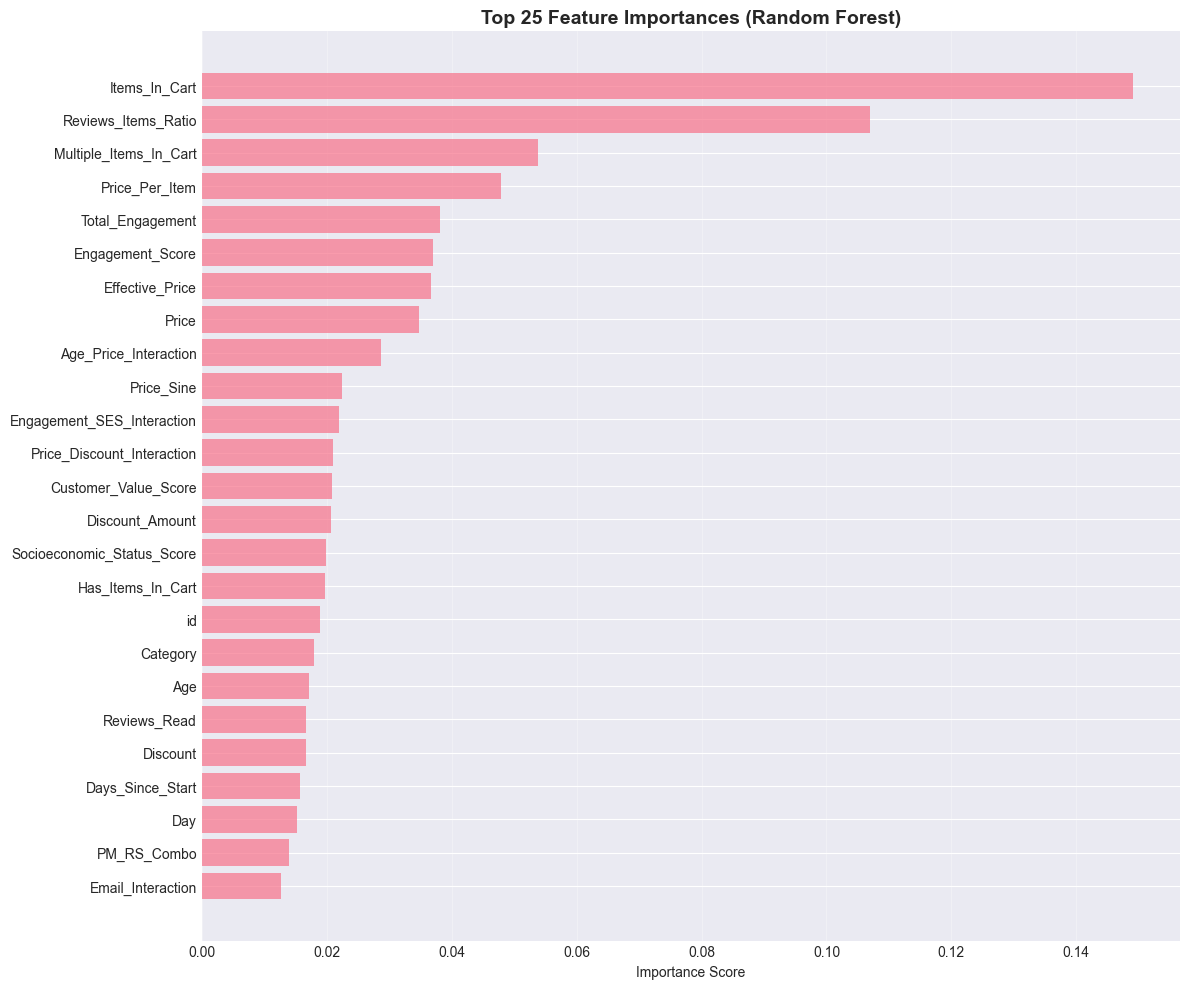

In [91]:
# Visualize feature importance
plt.figure(figsize=(12, 10))
top_features = feature_importance.head(25)
plt.barh(range(len(top_features)), top_features['Importance'], alpha=0.7)
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('Importance Score')
plt.title('Top 25 Feature Importances (Random Forest)', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

## 12. Key Insights Summary

In [92]:
# Compile key insights
print("="*80)
print("KEY INSIGHTS FROM EDA & FEATURE ENGINEERING")
print("="*80)

print("\n1. TARGET VARIABLE")
print("-" * 80)
print(f"   - Overall purchase rate: {purchase_rate:.2%}")
print(f"   - Class imbalance ratio: {(1-purchase_rate)/purchase_rate:.1f}:1")

print("\n2. CAMPAIGN EFFECTIVENESS")
print("-" * 80)
campaign_stats = train_df.groupby('Campaign_Period')['Purchase'].mean()
print(f"   - Purchase rate during campaigns: {campaign_stats[True]:.2%}")
print(f"   - Purchase rate outside campaigns: {campaign_stats[False]:.2%}")
print(f"   - Campaign lift: {(campaign_stats[True]/campaign_stats[False]-1)*100:.1f}%")

print("\n3. TOP CORRELATED FEATURES WITH PURCHASE")
print("-" * 80)
print(target_corr.head(6))

print("\n4. FEATURES CREATED")
print("-" * 80)
print(f"   - Original features: {train_df.shape[1]}")
print(f"   - Engineered features: {train_engineered.shape[1]}")
print(f"   - New features added: {train_engineered.shape[1] - train_df.shape[1]}")

print("\n5. TOP FEATURE CATEGORIES (by importance)")
print("-" * 80)
for i, row in feature_importance.head(10).iterrows():
    print(f"   {i+1}. {row['Feature']}: {row['Importance']:.4f}")

print("\n" + "="*80)

KEY INSIGHTS FROM EDA & FEATURE ENGINEERING

1. TARGET VARIABLE
--------------------------------------------------------------------------------
   - Overall purchase rate: 36.81%
   - Class imbalance ratio: 1.7:1

2. CAMPAIGN EFFECTIVENESS
--------------------------------------------------------------------------------
   - Purchase rate during campaigns: 43.39%
   - Purchase rate outside campaigns: 32.94%
   - Campaign lift: 31.7%

3. TOP CORRELATED FEATURES WITH PURCHASE
--------------------------------------------------------------------------------
Purchase                      1.000000
Reviews_Read                  0.150997
Email_Interaction             0.117265
Engagement_Score              0.102906
Socioeconomic_Status_Score    0.039314
Discount                      0.025211
Name: Purchase, dtype: float64

4. FEATURES CREATED
--------------------------------------------------------------------------------
   - Original features: 23
   - Engineered features: 67
   - New features

## 13. Save Engineered Data

In [97]:
# Save engineered datasets
train_engineered.to_csv('/Users/jakobbullinger/Documents/Coding Projects/DSBA/Intro Machine Learning/kaggle_competition/data/processed/train_engineered.csv', index=False)
test_engineered.to_csv('/Users/jakobbullinger/Documents/Coding Projects/DSBA/Intro Machine Learning/kaggle_competition/data/processed/test_engineered.csv', index=False)

print("Engineered datasets saved!")
print(f"Train: {train_engineered.shape}")
print(f"Test: {test_engineered.shape}")

Engineered datasets saved!
Train: (13735, 67)
Test: (6265, 66)


## 14. Next Steps

### For Tomorrow's Team Discussion:

1. **Feature Selection**
   - Compare which features each team member found most useful
   - Decide on a unified feature set or test multiple combinations
   - Consider dimensionality reduction (PCA, feature selection methods)

2. **Model Selection**
   - Test multiple algorithms (Logistic Regression, Random Forest, XGBoost, etc.)
   - Consider ensemble methods
   - Set up proper cross-validation

3. **Class Imbalance Handling**
   - Test SMOTE, class weights, or undersampling
   - Evaluate using appropriate metrics (F1, ROC-AUC, Precision-Recall)

4. **Business Constraints**
   - Set threshold to achieve ≤€200/day budget (max 2000 sessions)
   - Optimize for precision to reduce wasted ad spend
   - Create cost-benefit analysis

5. **Insights & Playbook**
   - Develop 3-5 actionable marketing rules from feature importance
   - Create customer segments for targeted marketing
   - Document findings for the report

## Notes & Ideas

Use this section to document your own observations and ideas:

- 
- 
- 